# ***Predicción de la accidentalidad en Medellin***

# ***1. Previsualización de datos***

AÑO = Año de ocurrencia del incidente	true

CBML	= Codigo catastral que corresponde al codigo comuna, barrio, manzana, lote catastral de un predio.

CLASE_ACCIDENTE = Clasificación del IPAT sobre la clase de accidente de transito: choque, atropello, volcamiento, caida de ocupante, incendio, u otro (que no corresponde a las anteriores 5 clasificaciones, p. ej: sumersión)

DIRECCION	= Dirección donde ocurrió el incidente.

DIRECCION ENCASILLADA = Dirección encasillada que entrega el geocodificador.

DISEÑO = Sitio de la vía donde ocurrió el accidente: Cicloruta, Glorieta, Interseccion, Lote o Predio, Paso a Nivel, Paso Elevado, Paso Inferior, Pontón, Puente, Tramo de via, Tunel, Via peatonal.

EXPEDIENTE = Consecutivo que asigna UNE, según el orden de llegada de los expedientes para su diligenciamiento.

FECHA_ACCIDENTE = Fecha del accidente, proviene del IPAT - Informe Policial de accidente de Tránsito.

FECHA_ACCIDENTES = Fecha de los accidente (formato YYYY-MM-DD hh:mi:ss), proviene del IPAT - Informe Policial de accidentes de Tránsito.

GRAVEDAD_ACCIDENTE = Clasificación del IPAT - Informe Policial de Accidentes de Tránsito, sobre la gravedad del accidente, corresponde al resultado más grave presentado en el accidente. Daños materiales "Sólo daños", accidente con heridos "Herido", accidente con muertos "Muerto". No indica cantidad.

MES = Mes de ocurrencia del incidente vial.

NRO_RADICADO = Consecutivo que asigna UNE, según el orden de llegada de los expedientes para su diligenciamient.

NUMCOMUNA = Numero de la comununa en la que ocurrio incidente vial.

BARRIO = Barrio de ocurrencia del incidente vial.

COMUNA = Denominación con la cual se identifica cada Comuna o Corregimiento. 01:Popular 02:Santa Cruz 03:Manrique 04:Aranjuez 05:Castilla 06:Doce de Octubre 07:Robledo 08:Villa Hermosa 09:Buenos Aires 10:La Candelaria 11:Laureles - Estadio 12:La América 13:San Javier 14:El Poblado 15:Guayabal 16:Belén 50:San Sebastián de Palmitas 60:San Cristobal 70:Altavista 80:San Antonio de Prado 90:Santa Elena 99:Toda la Ciudad.

LOCATION = Fuente de información con la cual se realizó la geocodificación. [longitud, latitud].

X = Coordenada X en metros del accidente, en sistema de coordenadas MAGNA Medellin Local.

Y = Coordenada Y en metros del accidente, en sistema de coordenadas MAGNA Medellin Local.

In [1]:
#Librerias a utilizar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split,TimeSeriesSplit

# Machine Learning metrics
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.linear_model import LogisticRegression
# Randomizer
import random
# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***2. Visualización de los datos***

In [ ]:
#Cargamos la base de datos, le indicamos la ruta en donde se encuentra
data = pd.read_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/incidentes_viales.csv', sep=';', low_memory=False)
data

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2017,0913,Atropello,CR 28 CL 38 F,CR 028 038 F 000 00000,Lote o Predio,A000585344,21/04/2017 17:30:00,2017-04-21T22:30:00.000Z,Con heridos,4,1579271,09,Loreto,Buenos Aires,"[-75.5559460731, 6.23260034372]",836369.48,1181189.27
270761,2017,1115,Caida Ocupante,CL 53 CR 69,CL 053 069 000 00000,Lote o Predio,A000580176,10/03/2017 16:30:00,2017-03-10T21:30:00.000Z,Con heridos,3,1573925,11,Cuarta Brigada,Laureles Estadio,"[-75.5851522144, 6.26044928627]",833145.10,1184279.21
270762,2017,0513,Choque,CR 64 C CL 92,CR 064 C 092 000 00000,Tramo de via,A000580528,10/03/2017 17:10:00,2017-03-10T22:10:00.000Z,Solo daños,3,1574088,05,Francisco Antonio Zea,Castilla,"[-75.5713587099, 6.28457841509]",834679.61,1186944.12
270763,2017,0607,Caida Ocupante,CR 78 A CL 92,CR 078 A 092 000 00000,Tramo de via,A000580245,10/03/2017 20:00:00,2017-03-11T01:00:00.000Z,Con heridos,3,1573855,06,Kennedy,Doce de Octubre,"[-75.5831132045, 6.28957484792]",833380.07,1187500.58


In [ ]:
data.dtypes

AÑO                       object
CBML                      object
CLASE_ACCIDENTE           object
DIRECCION                 object
DIRECCION ENCASILLADA     object
DISEÑO                    object
EXPEDIENTE                object
FECHA_ACCIDENTE           object
FECHA_ACCIDENTES          object
GRAVEDAD_ACCIDENTE        object
MES                        int64
NRO_RADICADO              object
NUMCOMUNA                 object
BARRIO                    object
COMUNA                    object
LOCATION                  object
X                        float64
Y                        float64
dtype: object

# ***3. Limpieza de los datos***

Como se puede apreciar las variables que conforman el conjunto de datos en su gran mayoría son variables categóricas, para el objetivo de la aplicación algunas no son importantes:

CBML: Ya que es más útil tener el nombre del barrio o comuna que el mismo código.

DIRECCIÓN Y DIRECCIÓN ENCASILLADA: No nos van aportar mucho, ya que para eso tenemos las coordenadas geograficas.

EXPEDIENTE: Es solo un identificador, que tampoco va aportar al uso de los datos.

FECHA_ACCIDENTE: De esta variable solo se va extraer el día, ya que tanto el mes como el año se tienen en variables aparte, teniendo en cuenta que la minima unidad temporal va ser el día, por tanto se puede descartar la hora, min, etc.

FECHA_ACCIDENTES: Ya se tienen los valores importantes a usar.

NRO_RADICADO: Es otro identificador más.

X y Y: Se van a utilizar las coordenadas de longitud y latitud.

COMUNA: En los datos vemos que existen dos variables una para la comuna y otro para el número de la columna, por lo que se va suprimir la variable del nombre de la columna, entendiendo que ya se ve representada por el número.

La variable LOCATION se va transformar en dos, una para longitud que va tener el primer valor, y otra para la variable latitud que va tener el segundo valor de la lista.

In [ ]:
data = data.drop(['CBML','DIRECCION ENCASILLADA','EXPEDIENTE','FECHA_ACCIDENTES','NRO_RADICADO','X','Y','COMUNA'], axis=1)
data

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,10,Barrio Colón,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,10,San Diego,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,02,La Francia,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,01,Santo Domingo Savio No. 1,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,15,Santa Fé,"[-75.578180998, 6.21699243701]"
...,...,...,...,...,...,...,...,...,...,...
270760,2017,Atropello,CR 28 CL 38 F,Lote o Predio,21/04/2017 17:30:00,Con heridos,4,09,Loreto,"[-75.5559460731, 6.23260034372]"
270761,2017,Caida Ocupante,CL 53 CR 69,Lote o Predio,10/03/2017 16:30:00,Con heridos,3,11,Cuarta Brigada,"[-75.5851522144, 6.26044928627]"
270762,2017,Choque,CR 64 C CL 92,Tramo de via,10/03/2017 17:10:00,Solo daños,3,05,Francisco Antonio Zea,"[-75.5713587099, 6.28457841509]"
270763,2017,Caida Ocupante,CR 78 A CL 92,Tramo de via,10/03/2017 20:00:00,Con heridos,3,06,Kennedy,"[-75.5831132045, 6.28957484792]"


In [ ]:
def extraer_dia(fecha):
    try:
        dia = int(fecha.split('/')[0][:2])
        return dia
    except:
        return None
def extraer_longitud(location):
    try:
        longitud = float(location.split(',')[0].replace('[', ''))
        return longitud
    except:
        return None
def extraer_latitud(location):
    try:
        latitud = float(location.split(',')[1].replace(']', ''))
        return latitud
    except:
        return None
#Extraemos el día, la longitud y la latitud
data['DIA'] = data['FECHA_ACCIDENTE'].apply(extraer_dia)
data['longitud'] = data['LOCATION'].apply(extraer_longitud)
data['latitud'] = data['LOCATION'].apply(extraer_latitud)
data=data.drop(['LOCATION'],axis=1)

Para mayor flexibilidad se va a redefinir el nombre de las variables.

In [ ]:
data=data.rename(columns={'AÑO':'Anio','CLASE_ACCIDENTE':'Tipo','DISEÑO':'Diseno','GRAVEDAD_ACCIDENTE':'Gravedad','MES':'Mes','NUMCOMUNA':'NroComuna','BARRIO':'Barrio','DIA':'Dia','FECHA_ACCIDENTE':'Fecha_exacta'})
data.head()

,Anio,Tipo,DIRECCION,Diseno,Fecha_exacta,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,10,Barrio Colón,21,-75.568801,6.243123
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,10,San Diego,5,-75.569388,6.228700
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,02,La Francia,21,-75.550391,6.298695
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,01,Santo Domingo Savio No. 1,21,-75.544220,6.300194
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,15,Santa Fé,3,-75.578181,6.216992


Pasamos a ver que tipo de dato, está almacenando cada variable, para verificar que tena sentido en la manipulación.

In [ ]:
print(data.dtypes)

Anio             object
Tipo             object
DIRECCION        object
Diseno           object
Fecha_exacta     object
Gravedad         object
Mes               int64
NroComuna        object
Barrio           object
Dia               int64
longitud        float64
latitud         float64
dtype: object


Como podemos apreciar tenemos variables como el año, que sería más factibles si se trabajan como datos de tipo entero, porque así es más sencillo la manipulación de las fechas. Por lo que se va ver cuales son los valores diferentes que hay en la variable.

In [ ]:
data['Anio'].unique()

array(['2015', '2014', '2016', '2017', '2018', '2019\\r', '2019', '2020'],
      dtype=object)

Como podemos apreciar hay un valor para los años '2019\\r' que debe hacer referencia al año 2019, para poder pasar los valores de los datos a enteros, vamos primero hacer la transformación a '2019', y luego de toda la columna a valores enteros.

In [ ]:
# Reemplazamos '2019\\r' por '2019'
data['Anio'] = data['Anio'].str.strip()
data['Anio'] = data['Anio'].replace('2019\\r', '2019')
#Hacemos las conversión a valores enteros
data['Anio'] = data['Anio'].str.replace("'", '').astype(int)

Identificación de datos nulos

In [ ]:
null_counts = data.isnull().sum()

# Calcula el total de filas en tu DataFrame
total_rows = len(data)

# Calcula el porcentaje de nulos por columna
null_percentage = (null_counts / total_rows) * 100

# Crea un nuevo DataFrame con las columnas 'Columna' y 'Cantidad de Nulos'
null_summary = pd.DataFrame({'Columna': null_counts.index, 'Cantidad de Nulos': null_counts, 'Porcentaje': null_percentage})
null_summary.reset_index(drop=True, inplace=True)
null_summary

,Columna,Cantidad de Nulos,Porcentaje
0,Anio,0,0.000000
1,Tipo,6,0.002216
2,DIRECCION,0,0.000000
3,Diseno,1148,0.423984
4,Fecha_exacta,0,0.000000
5,Gravedad,0,0.000000
6,Mes,0,0.000000
7,NroComuna,0,0.000000
8,Barrio,19006,7.019371
9,Dia,0,0.000000


Los valores faltantes de la variable Diseno y la variable Tipo se van a inputar con la moda.

In [ ]:
data['Tipo'] = data['Tipo'].fillna(data['Tipo'].mode()[0])
data['Diseno'] = data['Diseno'].fillna(data['Diseno'].mode()[0])

Como se puede apreciar a simple vista hay 19006 datos faltantes del barrio, pero vemos que en el resto de campos están todos los valores, por lo que se podrían llegar a inputar a partir de la dirección, vamos a ver más a fondo que contienen estos datos.

In [ ]:
data[(data['Barrio'].isnull())]

,Anio,Tipo,DIRECCION,Diseno,Fecha_exacta,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
24,2015,Choque,TV 39 B CL 4,Tramo de via,07/11/2015 09:00:00,Solo daños,11,Sin Inf,NaN,7,-75.703776,6.221415
26,2015,Choque,CR 80 CL 15,Tramo de via,09/11/2015 01:30:00,Con heridos,11,Sin Inf,NaN,9,-75.703776,6.221415
36,2015,Choque,CL 647 CR 62,Tramo de via,09/11/2015 06:20:00,Solo daños,11,Sin Inf,NaN,9,-75.703776,6.221415
53,2015,Otro,CR 93 CL 97 D,Tramo de via,10/11/2015 12:00:00,Con heridos,11,Sin Inf,NaN,10,-75.703776,6.221415
69,2015,Choque,CL 33 A NorOrienteCR 64,Tramo de via,10/11/2015 03:25:00,Solo daños,11,Sin Inf,NaN,10,-75.703776,6.221415
...,...,...,...,...,...,...,...,...,...,...,...,...
270703,2017,Choque,CL 58 CR 96,Tramo de via,03/03/2017 07:20:00,Con heridos,3,Sin Inf,NaN,3,-75.703776,6.221415
270713,2017,Choque,CL 446 CR 1,Tramo de via,04/03/2017 12:28:00,Solo daños,3,Sin Inf,NaN,4,-75.703776,6.221415
270722,2017,Atropello,CL 999 CR 999,Lote o Predio,05/03/2017 23:00:00,Con heridos,3,Sin Inf,NaN,5,-75.703776,6.221415
270745,2017,Choque,CR 999 CL 999,Tramo de via,08/03/2017 09:54:00,Solo daños,3,Sin Inf,NaN,8,-75.703776,6.221415


Como se puede apreciar en los valores donde no se tiene el barrio, tampoco se tiene información de la comuna, y vemos que en los valores de longitud y latitud, la gran mayoría tienen el valor de -75.703776 y 6.221415, que corresponden a una ubicación totalmente alejada de la ciudad de Medellín por lo que los registros que tengan estos valores en estos dos campos se van a descartar ya que no nos sirven al para el propósito de ubicación en la aplicación, luego con los registros restantes en donde los valores sean diferentes se van intentar inputar mediante la API de gogle maps, a partir de la dirección, y los que no encuentre la aplicación simplmente se van a descartar.

In [ ]:
data = data.drop(data[(data['longitud'] == -75.7037762763) & (data['latitud'] ==  6.22141524356)].index)
data[data['Barrio'].isnull()]

,Anio,Tipo,DIRECCION,Diseno,Fecha_exacta,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
154,2015,Choque,Tramo 8 KM 9,Tramo de via,22/11/2015 09:15:00,Solo daños,11,Sin Inf,NaN,22,-75.540183,6.153014
274,2015,Choque,Santa Elena KM 3,Tramo de via,07/12/2015 02:40:00,Solo daños,12,Sin Inf,NaN,7,-75.529967,6.227976
288,2015,Choque,Tramo 8 KM 1,Tramo de via,09/12/2015 04:00:00,Con heridos,12,Sin Inf,NaN,9,-75.545148,6.206222
390,2015,Choque,CL 12 sur CR 50,Tramo de via,03/11/2015 07:00:00,Solo daños,11,Sin Inf,NaN,3,-75.581875,6.195397
1227,2015,Choque,CL 12 Sur CR 50,Tramo de via,20/10/2015 09:00:00,Solo daños,10,Sin Inf,NaN,20,-75.581875,6.195397
...,...,...,...,...,...,...,...,...,...,...,...,...
268845,2016,Choque,CL 12 Sur CR 49,Interseccion,09/12/2016 12:30:00,Solo daños,12,Sin Inf,NaN,9,-75.581106,6.195185
268950,2016,Choque,CL 12 Sur CR 49,Tramo de via,23/12/2016 14:10:00,Solo daños,12,Sin Inf,NaN,23,-75.581106,6.195185
269109,2015,Choque,Santa Elena KM 14,Tramo de via,25/11/2015 05:15:00,Con heridos,11,Sin Inf,NaN,25,-75.501664,6.219353
269309,2015,Otro,CL 12 sur CR 50,Tramo de via,04/11/2015 03:00:00,Con heridos,11,Sin Inf,NaN,4,-75.581875,6.195397


In [ ]:
from geopy.geocoders import GoogleV3
def obtener_barrio_medellin(direccion):
    query = direccion +', Medellín, Antioquia'
    geolocalizador = GoogleV3(api_key='KEY...')
    try:
        ubicacion = geolocalizador.geocode(query)
        if ubicacion:
            componentes = ubicacion.raw['address_components']
            for componente in componentes:
              if 'neighborhood' in componente['types'] or 'sublocality' in componente['types']:
                  return componente['long_name']
    except Exception as e:
        print("Error al obtener la ubicación:", e)
    return None

In [ ]:
data['Barrio'].fillna(data.loc[data['Barrio'].isnull()]['DIRECCION'].apply(obtener_barrio_medellin), inplace=True)

In [ ]:
data = data.dropna(subset=['Barrio'])
data.isnull().sum()

Anio            0
Tipo            0
DIRECCION       0
Diseno          0
Fecha_exacta    0
Gravedad        0
Mes             0
NroComuna       0
Barrio          0
Dia             0
longitud        0
latitud         0
dtype: int64

De igual forma se van a eliminar los registros duplicados, ya que no tiene mucho sentido de que se tenga registro del mismo accidente más de una vez, con la misma fecha, a la misma hora, en la mimsa ubicación geográfica.

In [ ]:
data.duplicated().sum()

180

In [ ]:
data = data.drop_duplicates()

Se va eliminar la variable Fecha_exacta ya que lo elementos de interés que son el día el año y el mes ya se tienen, se uso básicamente para corroborar valores duplicados, ya que la hora exacta no permitia verificar con mayor seguridad si dos registros eran iguales.

In [ ]:
data= data.drop(['Fecha_exacta'],axis=1)

Con esta última limpieza vamos a cerciorarnos de que todos los valores en las variables tengan sentido, y además en las variables categóricas vamos a ver como se distribuyen las distintas categórias.



***Barrio***

In [ ]:
len(data['Barrio'].unique())

492

En los valores del Barrio hay varios errores, en primer lugar según la Alcaldía de Medellín se cuenta con 249 barrios urbanos oficiales, 52 veredas, 20 areas áreas Institucionales, 7 áreas de expansión (urbano – rural). Pero vemos que la cantidad de datos únicos de los barrios son 492, por lo que analizando a profundidad los valores vemos que muchos están por código de barrio por lo que se van modificar con su respectivo barrio, y también vemos los caracteres que anteriormente se mencionaron, como lo son las letras con tildes y las ñ, por lo que también se van a modificar.

In [ ]:
data['Barrio'].unique()

array(['Barrio Colón', 'San Diego', 'La Francia',
       'Santo Domingo Savio No. 1', 'Santa Fé', 'La Florida',
       'Los Conquistadores', 'La Alpujarra', 'Villa Nueva',
       'Facultad de Minas U. Nacional', 'La Esperanza',
       'Perpetuo Socorro', 'Campo Valdés No. 1', 'Miraflores',
       'Oleoducto', 'Terminal de Transporte', 'Gerona',
       'U.D. Atanasio Girardot', 'Alejandro Echavarría',
       'Cabecera San Antonio de Prado', 'Manila', 'Los Balsos No.2',
       'Moravia', 'Tenche', 'Universidad Nacional', 'Los Colores',
       'Caribe', 'Juan XXIII La Quiebra', 'Belalcázar', 'Santa Cruz',
       'Sucre', 'La Candelaria', 'El Estadio', 'Suramericana',
       'La Gloria', 'Centro Administrativo', 'Las Estancias',
       'Aures No. 2', 'Los Ángeles', 'Castilla', 'La Salle', 'La América',
       'Picacho', 'Bosques de San Pablo', 'La Aguacatala',
       'Playón de Los Comuneros', 'Estación Villa', 'La Colina',
       'Popular', 'Villa del Socorro', 'Cucaracho',
       'Santa 

In [ ]:
barrios = pd.read_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/barrios.csv', sep=',', low_memory=False)
barrios = barrios.set_index('codigo')['barrio'].to_dict()
barrios = {str(k).zfill(4): v for k, v in barrios.items()}
for key, value in barrios.items():
    data['Barrio'] = data['Barrio'].str.replace(key, value)

In [ ]:
barriosdf = pd.DataFrame(list(barrios.items()), columns=['Codigo', 'Barrio'])
barriosdf

,Codigo,Barrio
0,0101,Santo Domingo Savio No. 1
1,0102,Santo Domingo Savio No. 2
2,0103,Popular
3,0104,Granizal
4,0105,Moscú No. 2
...,...,...
252,6002,San Cristóbal cabecera
253,7001,Buga Patio Bonito
254,7002,Aguas Frias
255,9004,Barro Blanco


https://www.medellin.gov.co/irj/portal/medellin?NavigationTarget=contenido/11871-Perfiles-Demograficos-por-Comuna-y-Barrios-2016-2020

In [ ]:
def corregir_caracteres(texto):
    caracteres = {
        "\\xE1": "á",
        "\\xE9": "é",
        "\\xED": "í",
        "\\xF3": "ó",
        "\\xFA": "ú",
        "\\xF1": "ñ",
        "\\xC1": "Á",
        "\\xC9": "É",
        "\\xCD": "Í",
        "\\xD3": "Ó",
        "\\xDA": "Ú",
        "\\xD1": "Ñ",
        "No. 2":"No.2",
        "No. 1":"No.1",
        "No. 3":"No.3",
        'Villa Lilliam':'Villa Liliam',
        'Simón Bolivar':'Simón Bolívar',
        'Santa María de Los Ángeles':'Santa María de los Ángeles',
        'Nueva Villa de la Iguaná':'Nueva Villa de La Iguaná',
        'El Nogal - Los Almendros':'El Nogal Los Almendros',
        'Berlin':'Berlín',
        'Barrios de Jesús': 'Barrio de Jesús',
        'B. Cerro  El Volador':'B. Cerro El Volador',
        'Aguas frias':'Aguas Frias',
        'Sin Nombre':'El Pesebre',
        'Inst':'Laureles',
        'AUC1':'San Cristóbal cabecera',
        '0':'La Aguacatala',
        'El Nogal Los Almendros':'El Nogal-Los Almendros',
        '9La Aguacatala86':'La Aguacatala',
                  'Barrio Caycedo':'Barrio Caicedo',
                            'SUBURB El Plan':'Suburbano El Plan',
                            'AUC2':'El Astillero'
    }
    for key, value in caracteres.items():
        texto = texto.replace(key, value)
    return texto

# Aplica la función a la columna "Barrio" para corregir los caracteres
data['Barrio'] = data['Barrio'].apply(corregir_caracteres)

In [ ]:
sorted(list(data['Barrio'].unique()))

['Aguas Frias',
 'Aldea Pablo VI',
 'Alejandro Echavarría',
 'Alejandría',
 'Alfonso López',
 'Altamira',
 'Altavista',
 'Altavista Sector Central',
 'Altos del Poblado',
 'Andalucía',
 'Antonio Nariño',
 'Aranjuez',
 'Area De Expansion Altavista',
 'Area De Expansion Belen Rincon',
 'Area de Expansion Altos de Calasanz',
 'Asomadera No.1',
 'Asomadera No.2',
 'Asomadera No.3',
 'Astorga',
 'Aures No.1',
 'Aures No.2',
 'B. Cerro El Volador',
 'Barrio Caicedo',
 'Barrio Colombia',
 'Barrio Colón',
 'Barrio Cristóbal',
 'Barrio de Jesús',
 'Barro Blanco',
 'Batallón Girardot',
 'Belalcázar',
 'Belencito',
 'Bello Horizonte',
 'Belén',
 'Berlín',
 'Bermejal-Los Alamos',
 'Betania',
 'Blanquizal',
 'Bolivariana',
 'Bomboná No.1',
 'Bomboná No.2',
 'Boqueron',
 'Bosques de San Pablo',
 'Boston',
 'Boyacá',
 'Brasilia',
 'Buenos Aires',
 'Buga Patio Bonito',
 'Cabecera San Antonio de Prado',
 'Cabecera Urbana San Cristobal',
 'Calasanz',
 'Calasanz Parte Alta',
 'Calle Nueva',
 'Campo Alegr

In [ ]:
len(data['Barrio'].unique())

328

Con esto obtenemos un total de 328 valores diferentes para los barrios, donde están incluidos veredas, áreas de expansión o en algunos casos territorios que pueden estar alejados de la ciudad.

*** *texto en cursiva*NroComuna***

In [ ]:
data['NroComuna'].value_counts().sort_index()

0             11
01          3320
02          3134
03          7048
04         13283
05         23183
06          6398
07         15365
08          6033
09          9017
1            399
10         52103
11         27010
12          8041
13          4323
14         21689
15         18489
16         16778
2            308
3            727
4           1082
5           1688
50            17
6            496
60          2618
7           1127
70           570
8            675
80          4030
9            863
90           603
AU            10
In            97
SN             3
Sin Inf      322
Name: NroComuna, dtype: int64

En este caso observamos que como el tipo de dato de la variable es un object, tiene valores que representan los mismo como lo es '01' y '1' y así para los valores hasta el 9. por lo que se van agrupar en uno solo. Vemos además que hay valores como 'AU', 'In', 'SN', 'Sin Inf', '0' que no están representando un valor adecuado para la comuna, recordemos que Medellín cuenta con 16 comunas urbanas y 5 comunas rurales (50, 60, 70, 80 , 90). Por lo que se van a determinar el valor  verdadero de la comuna a partir del barrio.

In [ ]:
def corregir_cmna(texto):
    caracteres = {
        '01': '1',
        '02': '2',
        '03': '3',
        '04': '4',
        '05': '5',
        '06': '6',
        '07': '7',
        '08': '8',
        '09': '9'
    }
    for key, value in caracteres.items():
        texto = texto.replace(key, value)
    return texto

# Aplica la función a la columna "Barrio" para corregir los caracteres
data['NroComuna'] = data['NroComuna'].apply(corregir_cmna)

In [ ]:
df_correccion = data.loc[data['NroComuna'].isin(['AU', 'Sin Inf','SN','In','0'])]
df_correccion

,Anio,Tipo,DIRECCION,Diseno,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
154,2015,Choque,Tramo 8 KM 9,Tramo de via,Solo daños,11,Sin Inf,Mesa,22,-75.540183,6.153014
288,2015,Choque,Tramo 8 KM 1,Tramo de via,Con heridos,12,Sin Inf,Mesa,9,-75.545148,6.206222
390,2015,Choque,CL 12 sur CR 50,Tramo de via,Solo daños,11,Sin Inf,Guayabal,3,-75.581875,6.195397
773,2014,Choque,CL 47 D CR 70,Tramo de via,Solo daños,10,In,Laureles,17,-75.587903,6.253172
1157,2014,Otro,CL 53 D CR 85 E,Tramo de via,Con heridos,10,SN,El Pesebre,28,-75.601042,6.270381
...,...,...,...,...,...,...,...,...,...,...,...
268819,2016,Choque,CL 47 D CR 70,Lote o Predio,Solo daños,12,In,Laureles,5,-75.587903,6.253172
268845,2016,Choque,CL 12 Sur CR 49,Interseccion,Solo daños,12,Sin Inf,El Poblado,9,-75.581106,6.195185
268950,2016,Choque,CL 12 Sur CR 49,Tramo de via,Solo daños,12,Sin Inf,El Poblado,23,-75.581106,6.195185
269309,2015,Otro,CL 12 sur CR 50,Tramo de via,Con heridos,11,Sin Inf,Guayabal,4,-75.581875,6.195397


In [ ]:
comunas_barrios = {}
for clave, barrio in barrios.items():
    comuna = clave[:2]  # Obtiene los primeros dos dígitos de la clave
    if comuna[0] == '0':
        comuna = comuna[1]
    if comuna not in comunas_barrios:
        comunas_barrios[comuna] = []  # Crea una lista vacía si la comuna no existe
    comunas_barrios[comuna].append(barrio)
df_correccion['NroComuna'] = df_correccion['Barrio'].map({barrio: comuna for comuna, barrios in comunas_barrios.items() for barrio in barrios})
df_correccion

,Anio,Tipo,DIRECCION,Diseno,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
154,2015,Choque,Tramo 8 KM 9,Tramo de via,Solo daños,11,NaN,Mesa,22,-75.540183,6.153014
288,2015,Choque,Tramo 8 KM 1,Tramo de via,Con heridos,12,NaN,Mesa,9,-75.545148,6.206222
390,2015,Choque,CL 12 sur CR 50,Tramo de via,Solo daños,11,15,Guayabal,3,-75.581875,6.195397
773,2014,Choque,CL 47 D CR 70,Tramo de via,Solo daños,10,11,Laureles,17,-75.587903,6.253172
1157,2014,Otro,CL 53 D CR 85 E,Tramo de via,Con heridos,10,13,El Pesebre,28,-75.601042,6.270381
...,...,...,...,...,...,...,...,...,...,...,...
268819,2016,Choque,CL 47 D CR 70,Lote o Predio,Solo daños,12,11,Laureles,5,-75.587903,6.253172
268845,2016,Choque,CL 12 Sur CR 49,Interseccion,Solo daños,12,14,El Poblado,9,-75.581106,6.195185
268950,2016,Choque,CL 12 Sur CR 49,Tramo de via,Solo daños,12,14,El Poblado,23,-75.581106,6.195185
269309,2015,Otro,CL 12 sur CR 50,Tramo de via,Con heridos,11,15,Guayabal,4,-75.581875,6.195397


In [ ]:
data.update(df_correccion)

In [ ]:
data[['Anio','Mes','Dia']] = data[['Anio','Mes','Dia']].astype(int)

In [ ]:
data.loc[data['NroComuna'].isin(['AU', 'Sin Inf','SN','In','0'])]['Barrio'].unique()

array(['Mesa', 'Zona 9'], dtype=object)

Vemos que quedaron faltando las comunas para los barrios Mesa y Zona que son barrios que pertenecen a Envigado, por lo que se van a eliminar estos registros.

In [ ]:
data = data[~data['Barrio'].isin(['Mesa','Zona 9'])]

In [ ]:
data['NroComuna'].value_counts().sort_index()

1      3719
10    52110
11    27107
12     8041
13     4326
14    21726
15    18641
16    16779
2      3442
3      7776
4     14366
5     24872
50       17
6      6895
60     2627
7     16493
70      570
8      6708
80     4031
9      9880
90      603
Name: NroComuna, dtype: int64

Eliminamos la columna DIRECCION que para el propósito no es tan relevante.

In [ ]:
data = data.drop(columns='DIRECCION',axis=1)

***Año***

In [ ]:
data['Anio'].value_counts()

2016    43514
2017    42705
2015    42689
2019    42422
2018    40202
2014    20757
2020    18440
Name: Anio, dtype: int64

***Tipo de accidente***

In [ ]:
from tabulate import tabulate

# Obtener el conteo de valores
count_series = data['Tipo'].value_counts().reset_index()
count_series.columns = ['Tipo', 'Cantidad']

# Imprimir como tabla
print(tabulate(count_series, headers='keys', tablefmt='pretty', showindex=False))

+-------------------+----------+
|       Tipo        | Cantidad |
+-------------------+----------+
|      Choque       |  169379  |
|       Otro        |  26690   |
|     Atropello     |  24036   |
|  Caida Ocupante   |  15747   |
|    Volcamiento    |   9051   |
| Caída de Ocupante |   5783   |
|     Incendio      |    28    |
|  Caída Ocupante   |    15    |
+-------------------+----------+


Como se puede apreciar, en la variable Tipo se tienen 3 categorías que siginifican los mismo pero están escritas de manera distina: Caida Ocupante, Caída de Ocupante, Caída Ocupante. Por lo que se van a reunir en una sola.

In [ ]:
data['Tipo'] = data['Tipo'].replace(['Caída de Ocupante', 'Caída Ocupante'], 'Caida Ocupante')
data['Tipo'].value_counts()

Choque            169379
Otro               26690
Atropello          24036
Caida Ocupante     21545
Volcamiento         9051
Incendio              28
Name: Tipo, dtype: int64

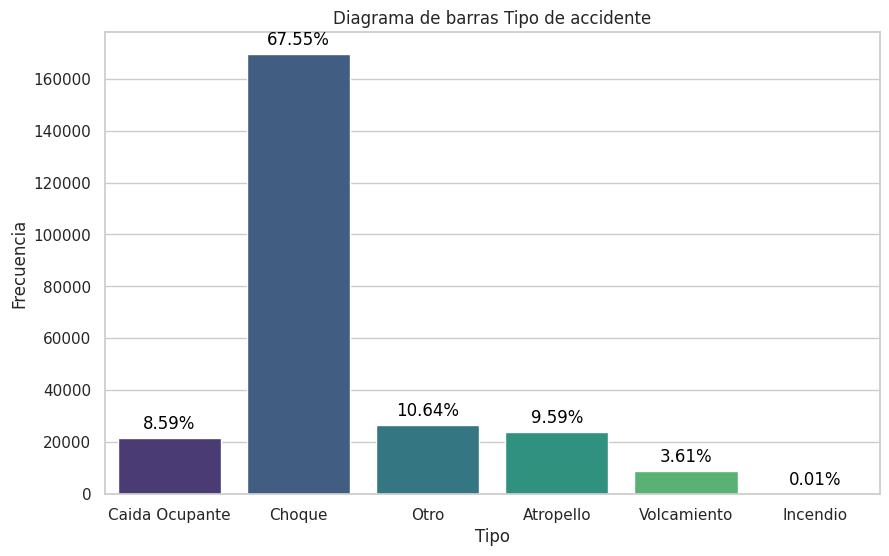

In [ ]:
import seaborn as sns

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Tipo', palette='viridis')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Diagrama de barras Tipo de accidente')

# Agrega el porcentaje dentro de cada barra
total_data = data['Tipo'].count()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_data:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Muestra el gráfico
plt.show()

***Diseño***

In [ ]:

# Obtener el conteo de valores
count_series2 = data['Diseno'].value_counts().reset_index()
count_series2.columns = ['Diseno', 'Cantidad']

# Imprimir como tabla
print(tabulate(count_series2, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+
|    Diseno     | Cantidad |
+---------------+----------+
| Tramo de via  |  173893  |
| Interseccion  |  42329   |
| Lote o Predio |  24019   |
|   Glorieta    |   6354   |
| Paso Elevado  |   1315   |
|    Puente     |   967    |
|  Ciclo Ruta   |   962    |
| Paso Inferior |   643    |
| Paso a Nivel  |   113    |
| Via peatonal  |    54    |
|     Tunel     |    51    |
|    Pontón     |    23    |
|   Pont\xF3n   |    6     |
+---------------+----------+


En este caso vemos que hay un error en la categoria Pont\xF3n,  donde "\xF3" representa un carácter especial en la codificación Latin-1 (ISO 8859-1) que corresponde a la letra "ó" con acento. Por lo que se va cambiar por Ponton, de igual modo le quitamos la tilde a Pontón.

In [ ]:
data['Diseno'] = data['Diseno'].replace(['Pont\\xF3n','Pontón'], 'Ponton')
data['Diseno'].value_counts()

Tramo de via     173893
Interseccion      42329
Lote o Predio     24019
Glorieta           6354
Paso Elevado       1315
Puente              967
Ciclo Ruta          962
Paso Inferior       643
Paso a Nivel        113
Via peatonal         54
Tunel                51
Ponton               29
Name: Diseno, dtype: int64

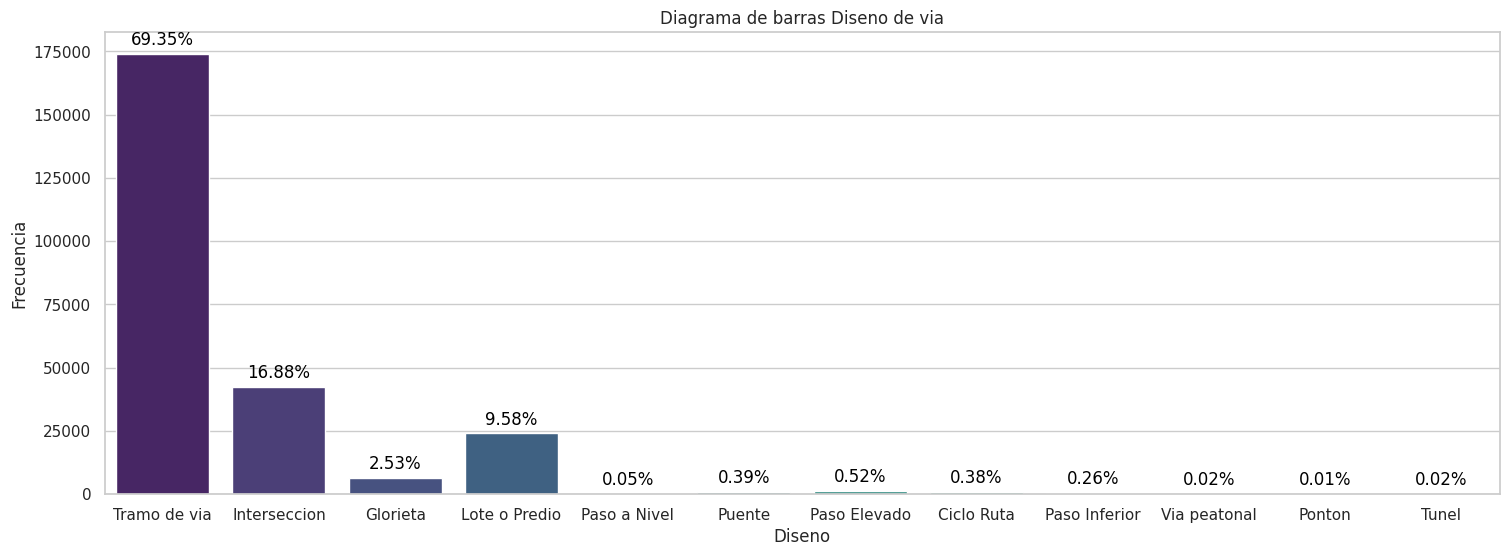

In [ ]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=data, x='Diseno', palette='viridis')
plt.xlabel('Diseno')
plt.ylabel('Frecuencia')
plt.title('Diagrama de barras Diseno de via')

# Agrega el porcentaje dentro de cada barra
total_data = data['Diseno'].count()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_data:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Muestra el gráfico
plt.show()

***Gravedad***

In [ ]:
# Obtener el conteo de valores
count_series3 = data['Gravedad'].value_counts().reset_index()
count_series3.columns = ['Gravedad', 'Cantidad']

# Imprimir como tabla
print(tabulate(count_series3, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+
|   Gravedad    | Cantidad |
+---------------+----------+
|  Con heridos  |  137225  |
|  Solo daños   |  92882   |
| Solo da\xF1os |  19238   |
|  Con muertos  |   1384   |
+---------------+----------+


En este caso también vemos una error en la codificación de caracteres nuevamente, donde \xF1 correponde a la letra ñ en varias codificaciones  incluyendo Latin-1 (ISO 8859-1), por lo que se van a cambiar ambos valores por 'Solo danos'.

In [ ]:
data['Gravedad']= data['Gravedad'].replace(['Solo daños','Solo da\\xF1os'], 'Solo danos')
data['Gravedad'].value_counts()

Con heridos    137225
Solo danos     112120
Con muertos      1384
Name: Gravedad, dtype: int64

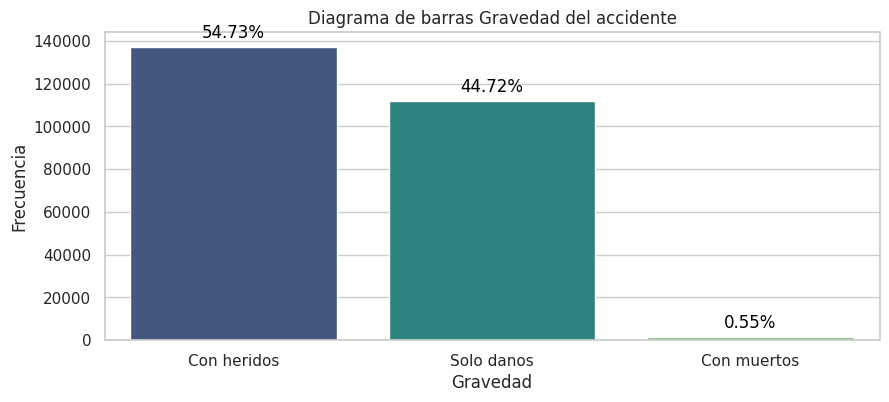

In [ ]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=data, x='Gravedad', palette='viridis')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')
plt.title('Diagrama de barras Gravedad del accidente')

# Agrega el porcentaje dentro de cada barra
total_data = data['Gravedad'].count()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_data:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Muestra el gráfico
plt.show()

***Mes***

In [ ]:
data['Mes'].value_counts()

8     25095
7     23262
9     22416
10    22252
12    21503
11    20713
2     20661
3     19876
5     19668
6     18812
1     18609
4     17862
Name: Mes, dtype: int64

***Dia***

In [ ]:
data['Dia'].value_counts().sort_index()

1     7907
2     8062
3     8072
4     8262
5     8491
6     8452
7     8065
8     8052
9     8166
10    8510
11    8335
12    8363
13    8282
14    8210
15    8304
16    8739
17    8464
18    8682
19    8248
20    8155
21    8482
22    8324
23    8436
24    8034
25    7935
26    8155
27    8275
28    8240
29    7465
30    7185
31    4377
Name: Dia, dtype: int64

In [ ]:
#data.to_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/DatosHistoricos.csv', index=False)

Con esto se finaliza la limpieza de los datos, quedandonos con 250737 registros y asegurandonos que cada una de las variables contiene información valiosa para el desarrollo de los modelos y los agrupamientos.

In [ ]:
data

,Anio,Tipo,Diseno,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
0,2015,Caida Ocupante,Tramo de via,Con heridos,10,10,Barrio Colón,21,-75.568801,6.243123
1,2015,Choque,Tramo de via,Solo danos,11,10,San Diego,5,-75.569388,6.228700
2,2015,Otro,Tramo de via,Con heridos,10,2,La Francia,21,-75.550391,6.298695
3,2015,Atropello,Tramo de via,Con heridos,10,1,Santo Domingo Savio No.1,21,-75.544220,6.300194
4,2015,Choque,Tramo de via,Solo danos,11,15,Santa Fé,3,-75.578181,6.216992
...,...,...,...,...,...,...,...,...,...,...
270760,2017,Atropello,Lote o Predio,Con heridos,4,9,Loreto,21,-75.555946,6.232600
270761,2017,Caida Ocupante,Lote o Predio,Con heridos,3,11,Cuarta Brigada,10,-75.585152,6.260449
270762,2017,Choque,Tramo de via,Solo danos,3,5,Francisco Antonio Zea,10,-75.571359,6.284578
270763,2017,Caida Ocupante,Tramo de via,Con heridos,3,6,Kennedy,10,-75.583113,6.289575


# ***4. Predicción de la accidentalidad en Medellín***

In [4]:
data_pred = pd.read_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/DatosHistoricos.csv', sep=',', low_memory=False)
data_pred

,Anio,Tipo,Diseno,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
0,2015,Caida Ocupante,Tramo de via,Con heridos,10,10,Barrio Colón,21,-75.568801,6.243123
1,2015,Choque,Tramo de via,Solo danos,11,10,San Diego,5,-75.569388,6.228700
2,2015,Otro,Tramo de via,Con heridos,10,2,La Francia,21,-75.550391,6.298695
3,2015,Atropello,Tramo de via,Con heridos,10,1,Santo Domingo Savio No.1,21,-75.544220,6.300194
4,2015,Choque,Tramo de via,Solo danos,11,15,Santa Fé,3,-75.578181,6.216992
...,...,...,...,...,...,...,...,...,...,...
250724,2017,Atropello,Lote o Predio,Con heridos,4,9,Loreto,21,-75.555946,6.232600
250725,2017,Caida Ocupante,Lote o Predio,Con heridos,3,11,Cuarta Brigada,10,-75.585152,6.260449
250726,2017,Choque,Tramo de via,Solo danos,3,5,Francisco Antonio Zea,10,-75.571359,6.284578
250727,2017,Caida Ocupante,Tramo de via,Con heridos,3,6,Kennedy,10,-75.583113,6.289575


Se busca poder predecir el número de accidentes que van a ocurrir a nivel semanal, diario y mensual por cada tipo de accidente En este caso solo vamos a necesitar las variables relacionadas con las fechas y el tipo de accidente
que pueden ser Atropello, Choque, Caída de ocupante, Volcamiento, Incendio u Otro.

In [5]:
data_pred = data_pred.drop(['Diseno','Gravedad','NroComuna','Barrio','longitud','latitud'],axis=1)
data_pred

,Anio,Tipo,Mes,Dia
0,2015,Caida Ocupante,10,21
1,2015,Choque,11,5
2,2015,Otro,10,21
3,2015,Atropello,10,21
4,2015,Choque,11,3
...,...,...,...,...
250724,2017,Atropello,4,21
250725,2017,Caida Ocupante,3,10
250726,2017,Choque,3,10
250727,2017,Caida Ocupante,3,10


In [6]:
data_pred[['Anio','Mes','Dia']] = data_pred[['Anio','Mes','Dia']].astype(int)

In [7]:
data_pred = data_pred[['Anio','Mes','Dia','Tipo']]
data_pred

,Anio,Mes,Dia,Tipo
0,2015,10,21,Caida Ocupante
1,2015,11,5,Choque
2,2015,10,21,Otro
3,2015,10,21,Atropello
4,2015,11,3,Choque
...,...,...,...,...
250724,2017,4,21,Atropello
250725,2017,3,10,Caida Ocupante
250726,2017,3,10,Choque
250727,2017,3,10,Caida Ocupante


In [8]:
data_pred = data_pred.sort_values(by=['Anio', 'Mes', 'Dia'], ascending=[True, True, True])
data_pred

,Anio,Mes,Dia,Tipo
42335,2014,7,4,Choque
42336,2014,7,4,Choque
42337,2014,7,4,Choque
49822,2014,7,4,Choque
49823,2014,7,4,Choque
...,...,...,...,...
173130,2020,8,31,Caida Ocupante
173131,2020,8,31,Otro
173132,2020,8,31,Choque
173133,2020,8,31,Atropello


A continuación se van agrupar el número de accidentes que hubieron cada día, por cada tipo de accidente ya que esta estructura nos facilitara el entrenamiento del modelo.

In [9]:
tipos_accidente = ['Atropello', 'Choque', 'Volcamiento','Otro','Incendio','Caida Ocupante']

# Iterar a través de cada tipo de accidente
for tipo in tipos_accidente:
    # Crear una nueva columna para el tipo de accidente y calcular la suma
    data_pred[tipo] = data_pred.apply(lambda fila: 1 if fila['Tipo'] == tipo else 0, axis=1)
data_pred

,Anio,Mes,Dia,Tipo,Atropello,Choque,Volcamiento,Otro,Incendio,Caida Ocupante
42335,2014,7,4,Choque,0,1,0,0,0,0
42336,2014,7,4,Choque,0,1,0,0,0,0
42337,2014,7,4,Choque,0,1,0,0,0,0
49822,2014,7,4,Choque,0,1,0,0,0,0
49823,2014,7,4,Choque,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
173130,2020,8,31,Caida Ocupante,0,0,0,0,0,1
173131,2020,8,31,Otro,0,0,0,1,0,0
173132,2020,8,31,Choque,0,1,0,0,0,0
173133,2020,8,31,Atropello,1,0,0,0,0,0


In [69]:
# Agrupar por año, mes y día, y sumar las columnas de cada tipo de accidente
data_pred = data_pred.groupby(['Anio', 'Mes', 'Dia']).agg({'Atropello': 'sum', 'Choque': 'sum', 'Volcamiento': 'sum','Incendio':'sum','Otro':'sum','Caida Ocupante':'sum'}).reset_index()
data_pred

,Anio,Mes,Dia,Atropello,Choque,Volcamiento,Incendio,Otro,Caida Ocupante
0,2014,7,4,0,23,0,0,0,0
1,2014,7,5,25,64,3,0,7,18
2,2014,7,6,16,41,0,0,12,10
3,2014,7,7,10,110,8,0,21,15
4,2014,7,8,7,84,3,0,14,11
...,...,...,...,...,...,...,...,...,...
2062,2020,2,25,19,96,9,0,15,19
2063,2020,2,26,14,88,8,0,13,9
2064,2020,2,27,14,91,8,0,14,16
2065,2020,2,28,12,68,7,0,13,10


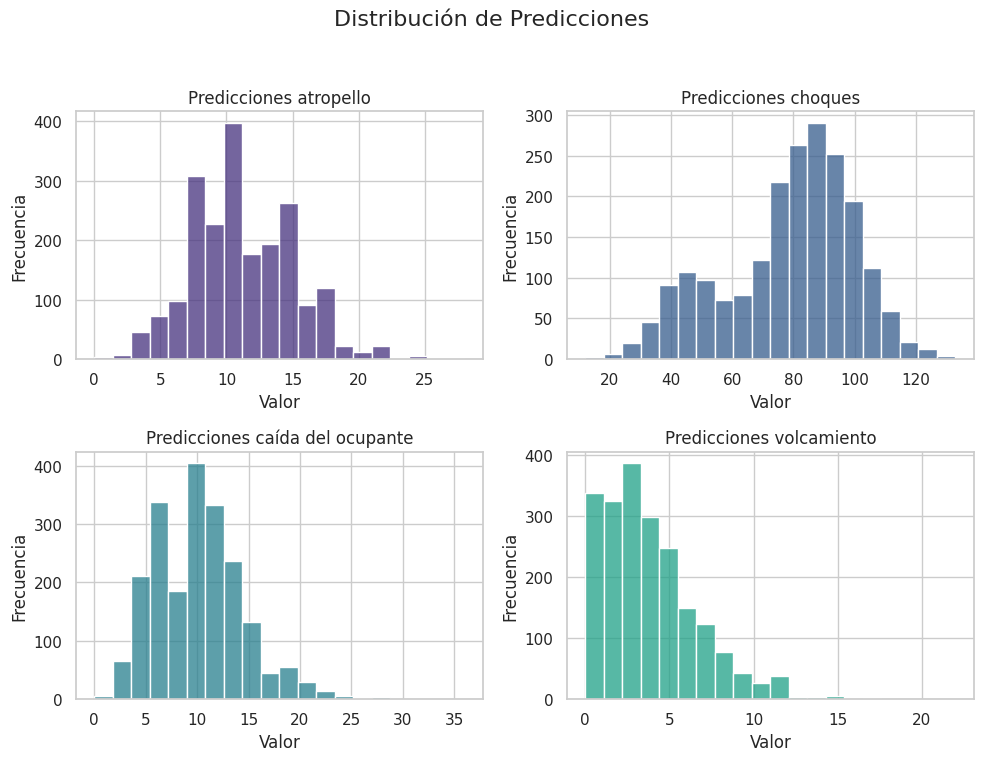

In [70]:
# Configurar el estilo 'viridis' de Seaborn
sns.set_palette("viridis")

# Crear el subplot para los histogramas
num_columns = 2
num_rows = 2
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 8))

# Iterar a través de las columnas y crear un histograma para cada una
columns_to_plot = ['Atropello', 'Choque', 'Caida Ocupante', 'Volcamiento']
titles = ['Predicciones atropello', 'Predicciones choques', 'Predicciones caída del ocupante', 'Predicciones volcamiento']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // num_columns, i % num_columns]

    # Usar un color diferente de la paleta 'viridis' para cada histograma
    sns.histplot(data_pred[col], bins=20, color=sns.color_palette("viridis")[i], ax=ax)

    ax.set_title(titles[i])
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño del gráfico
plt.suptitle('Distribución de Predicciones', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Eliminar ejes vacíos
for i in range(len(columns_to_plot), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Mostrar el gráfico
plt.show()

In [11]:
data_pred['Fecha'] = pd.to_datetime(data_pred['Anio'].astype(str) + '-' + data_pred['Mes'].astype(str) + '-' + data_pred['Dia'].astype(str), format='%Y-%m-%d')

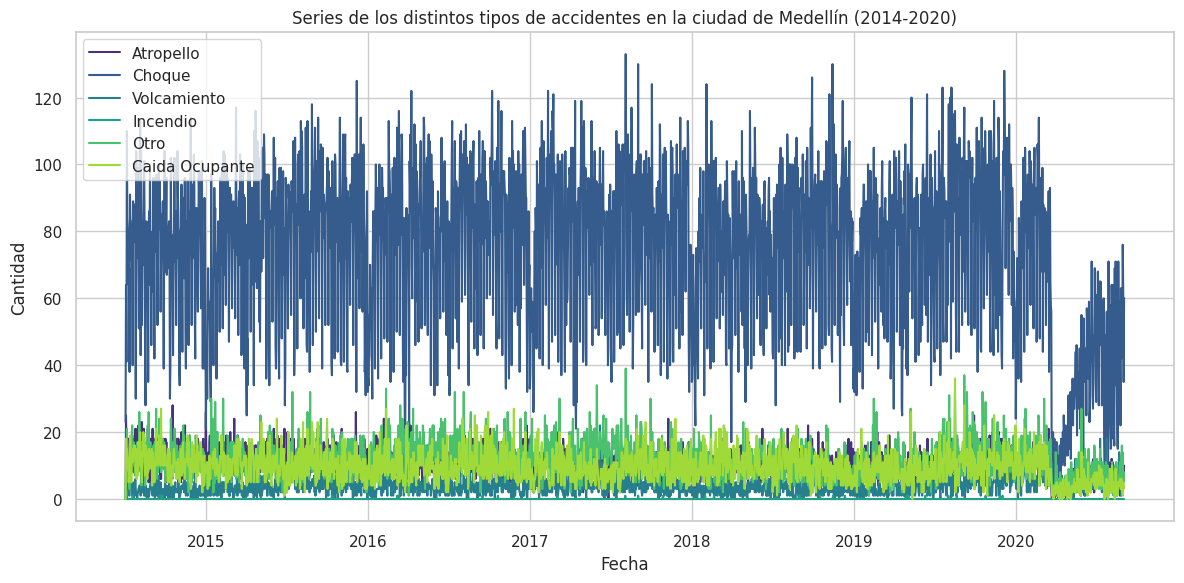

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importa Seaborn para mejorar el estilo
sns.set(style="whitegrid")  # Establece el estilo de Seaborn

# Define las series que deseas graficar
series_to_plot = ['Atropello', 'Choque', 'Volcamiento', 'Incendio', 'Otro', 'Caida Ocupante']

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Colores personalizados para cada serie
colors = sns.color_palette("viridis", len(series_to_plot))

# Itera sobre las series y agrégalas al gráfico con colores personalizados
for i, series in enumerate(series_to_plot):
    plt.plot(data_pred['Fecha'], data_pred[series], label=series, color=colors[i])

# Configura etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Series de los distintos tipos de accidentes en la ciudad de Medellín (2014-2020)')

# Agrega una leyenda y configura su ubicación
plt.legend(loc='upper left')

# Activa la cuadrícula
plt.grid(True)

# Mejora el espaciado y muestra el gráfico
plt.tight_layout()
plt.show()

Como se puede observar en las series de tiempo, cada una de ellas muestra patrones de comportamiento bastante similares hasta llegar al año 2020, donde se evidencia una marcada disminución en la cantidad de accidentes de todos los tipos. Esta disminución se debió principalmente a la pandemia de COVID-19, que impactó significativamente en las tendencias y patrones de las series.

Con el propósito de desarrollar un modelo que minimice las diferencias entre los datos de entrenamiento y validación, se ha decidido descartar los datos posteriores a marzo de 2020. Esta fecha marca el inicio de las restricciones de seguridad implementadas en la ciudad de Medellín en respuesta a la pandemia, y, por lo tanto, se considera un punto adecuado para dividir los datos.

Esta estrategia ayudará a evitar que el modelo sea entrenado con datos que reflejen condiciones anómalas causadas por la pandemia, permitiendo así una mejor generalización del modelo a las condiciones normales previas a 2020.

In [13]:
data_pred = data_pred[(data_pred['Anio'] < 2020) | ((data_pred['Anio'] == 2020) & (data_pred['Mes'] < 3))]
data_pred

,Anio,Mes,Dia,Atropello,Choque,Volcamiento,Incendio,Otro,Caida Ocupante,Fecha
0,2014,7,4,0,23,0,0,0,0,2014-07-04
1,2014,7,5,25,64,3,0,7,18,2014-07-05
2,2014,7,6,16,41,0,0,12,10,2014-07-06
3,2014,7,7,10,110,8,0,21,15,2014-07-07
4,2014,7,8,7,84,3,0,14,11,2014-07-08
...,...,...,...,...,...,...,...,...,...,...
2062,2020,2,25,19,96,9,0,15,19,2020-02-25
2063,2020,2,26,14,88,8,0,13,9,2020-02-26
2064,2020,2,27,14,91,8,0,14,16,2020-02-27
2065,2020,2,28,12,68,7,0,13,10,2020-02-28


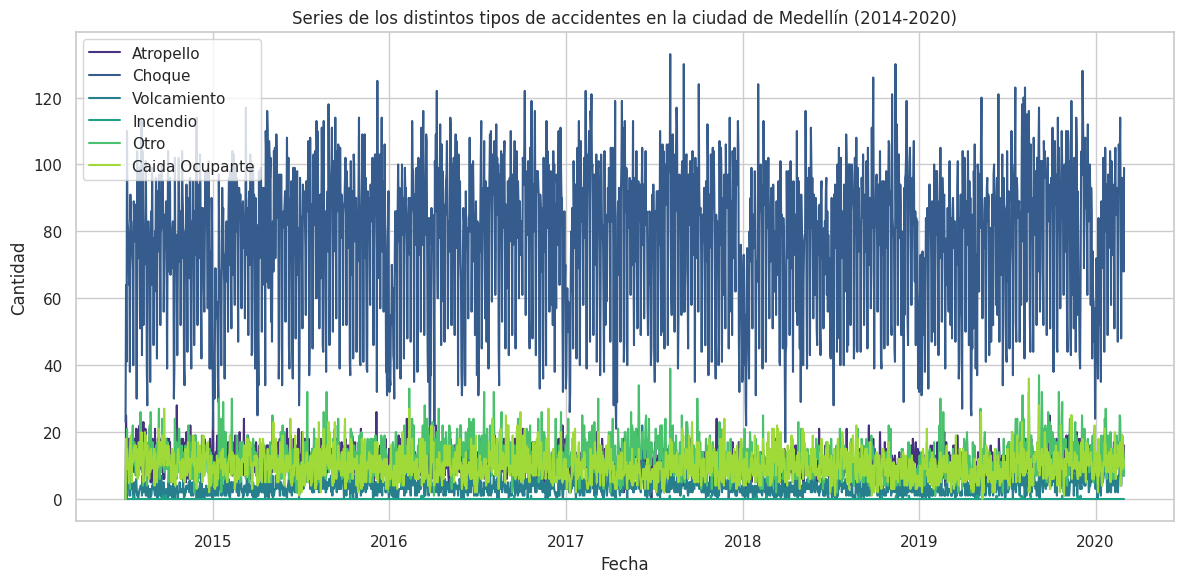

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importa Seaborn para mejorar el estilo
sns.set(style="whitegrid")  # Establece el estilo de Seaborn

# Define las series que deseas graficar
series_to_plot = ['Atropello', 'Choque', 'Volcamiento', 'Incendio', 'Otro', 'Caida Ocupante']

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Colores personalizados para cada serie
colors = sns.color_palette("viridis", len(series_to_plot))

# Itera sobre las series y agrégalas al gráfico con colores personalizados
for i, series in enumerate(series_to_plot):
    plt.plot(data_pred['Fecha'], data_pred[series], label=series, color=colors[i])

# Configura etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Series de los distintos tipos de accidentes en la ciudad de Medellín (2014-2020)')

# Agrega una leyenda y configura su ubicación
plt.legend(loc='upper left')

# Activa la cuadrícula
plt.grid(True)

# Mejora el espaciado y muestra el gráfico
plt.tight_layout()
plt.show()

Se va agregar una columna que va contener el nombre del día, otro para saber si ese la fecha del registro correspondía a un día festivo o no, otra para saber el registro a que semana del mes corresponde.

In [15]:
#Función para determinar el nombre del día, al que corresponde la fecha del registro
from datetime import datetime
def calcular_nombre_dia(fila):
    fecha = datetime(fila['Anio'], fila['Mes'], fila['Dia'])
    nombre_dia_ingles = fecha.strftime('%A')  # Obtén el nombre del día en inglés
    mapeo_dias = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }
    nombre_dia_espanol = mapeo_dias.get(nombre_dia_ingles, nombre_dia_ingles)
    return nombre_dia_espanol
data_pred['NombreDia'] = data_pred.apply(calcular_nombre_dia, axis=1)

In [16]:
#Con esto determinamos los días festivos de
import holidays
from datetime import date
festivos = []
años = list(range(2014, 2023))
for año in años:
    festivos_año = holidays.CO(years=año)
    for fecha, nombre in sorted(festivos_año.items()):
        festivos.append((fecha))

In [17]:
data_pred = data_pred.drop('Fecha',axis=1)
data_pred['FechaEspecial'] = data_pred.apply(lambda fila: 1 if date(fila['Anio'], fila['Mes'], fila['Dia']) in festivos else 0, axis=1)
data_pred[data_pred['FechaEspecial']==1]

,Anio,Mes,Dia,Atropello,Choque,Volcamiento,Incendio,Otro,Caida Ocupante,NombreDia,FechaEspecial
16,2014,7,20,15,40,2,1,14,11,Domingo,1
34,2014,8,7,11,43,1,0,8,11,Jueves,1
45,2014,8,18,13,28,1,0,5,16,Lunes,1
101,2014,10,13,8,39,0,0,11,10,Lunes,1
122,2014,11,3,9,34,2,0,14,5,Lunes,1
...,...,...,...,...,...,...,...,...,...,...,...
1956,2019,11,11,7,43,5,0,11,10,Lunes,1
1983,2019,12,8,11,69,6,0,10,10,Domingo,1
2000,2019,12,25,14,42,6,0,15,6,Miércoles,1
2007,2020,1,1,13,40,3,0,13,8,Miércoles,1


In [18]:
data_pred['FindeSemana'] = data_pred.apply(lambda fila: 1 if (fila['NombreDia']=='Sábado' or fila['NombreDia']=='Domingo') else 0,axis=1)
data_pred['DiaAnio'] = data_pred.apply(lambda fila: pd.Timestamp(fila['Anio'], fila['Mes'], fila['Dia']).dayofyear, axis=1)
data_pred

,Anio,Mes,Dia,Atropello,Choque,Volcamiento,Incendio,Otro,Caida Ocupante,NombreDia,FechaEspecial,FindeSemana,DiaAnio
0,2014,7,4,0,23,0,0,0,0,Viernes,0,0,185
1,2014,7,5,25,64,3,0,7,18,Sábado,0,1,186
2,2014,7,6,16,41,0,0,12,10,Domingo,0,1,187
3,2014,7,7,10,110,8,0,21,15,Lunes,0,0,188
4,2014,7,8,7,84,3,0,14,11,Martes,0,0,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,2020,2,25,19,96,9,0,15,19,Martes,0,0,56
2063,2020,2,26,14,88,8,0,13,9,Miércoles,0,0,57
2064,2020,2,27,14,91,8,0,14,16,Jueves,0,0,58
2065,2020,2,28,12,68,7,0,13,10,Viernes,0,0,59


División de datos:

Se van a dejar los últimos 12 meses para validación.

In [19]:
data_val = data_pred[(data_pred['Anio'] == 2020)  | (data_pred['Anio'] == 2019) & (data_pred['Mes'] >= 3)]
data_train = data_pred[~((data_pred['Anio'] == 2020)  | (data_pred['Anio'] == 2019) & (data_pred['Mes'] >= 3))]

Se va diseñar un modelo para cada tipo de accidente, como lo que se busca predecir en este caso son el número de accidentes, es decir un conteo, se pueden recomendar tres tipos de modelo que son útiles en estos casos:

1. Modelo de regresión tipo Poisson: En este modelo se asume que la media es  igual a la varianza.
2. Modelo de regresión Negativa Binomial: Este modelo es útil cuando hay sobredispersión es decir que la varianza es siginificativamente mayor a la media.
3. Modelo de Series de Tiempo(ARIMA): Qué son útiles para el caso, para ver como el número de accidentes varían a lo largo del tiempo, a partir de la identificación de componentes de tendencia, estacionalidad y del error.

En nuestro caso, se van a optar por uno de los modelos entre uno y dos, ya que si bien el de series de tiempo pude funcionar, para nuestra estructura de datos, a parte del tiempo queremos ser capaces de ver la importancia de otras variables en el modelo, como si el registro se trata de un día festivo, la semana del mes, el díae etc. Por lo tanto se va mirar el tema de la sobredispersión en cada modelo y en base a eso se elige el modelo, es decir en cada tipo de accidente donde la media sea aproximadamente igual a la varianza se va utilizar un modelo tipo Poisson, y donde se identifique sobredispersión de va utilizar un modelo de regresión negativa binomial.

In [20]:
data_train = data_train[['Anio','Mes','Dia','NombreDia','FechaEspecial','FindeSemana','DiaAnio','Atropello','Choque','Volcamiento','Incendio','Otro','Caida Ocupante']]
data_val = data_val[['Anio','Mes','Dia','NombreDia','FechaEspecial','FindeSemana','DiaAnio','Atropello','Choque','Volcamiento','Incendio','Otro','Caida Ocupante']]
data_train = pd.get_dummies(data_train, columns=['NombreDia','Mes'],prefix=[ 'Dia','Mes'],drop_first=True)
data_val = pd.get_dummies(data_val, columns=['NombreDia','Mes'],prefix=[ 'Dia','Mes'],drop_first=True)

***Atropello***

In [21]:
data_train_1 = data_train.drop(['Choque','Volcamiento','Incendio','Otro','Caida Ocupante'],axis=1)
data_val_1 = data_val.drop(['Choque','Volcamiento','Incendio','Otro','Caida Ocupante'],axis=1)
media = data_train_1['Atropello'].mean()
varianza = data_train_1['Atropello'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 11.095825984714873
Varianza: 15.64669433205381
Relación Varianza-Media: 1.4101423682750627


In [22]:
data_train_1

,Anio,Dia,FechaEspecial,FindeSemana,DiaAnio,Atropello,Dia_Jueves,Dia_Lunes,Dia_Martes,Dia_Miércoles,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,2014,4,0,0,185,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014,5,0,1,186,25,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2014,6,0,1,187,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2014,7,0,0,188,10,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,8,0,0,189,7,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2019,24,0,1,55,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,2019,25,0,0,56,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,2019,26,0,0,57,17,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1699,2019,27,0,0,58,12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from scipy.stats import zscore

# Para data_train_1
data_train_1["Zscore"] = zscore(data_train_1["Atropello"])
outliers_train = data_train_1[(data_train_1["Zscore"] > 2) | (data_train_1["Zscore"] < -2)]
data_train_1 = data_train_1.drop(outliers_train.index)

# Para data_val_1
data_val_1["Zscore"] = zscore(data_val_1["Atropello"])
outliers_val = data_val_1[(data_val_1["Zscore"] > 2) | (data_val_1["Zscore"] < -2)]
data_val_1 = data_val_1.drop(outliers_val.index)

In [24]:
data_val_1=data_val_1.drop('Zscore',axis=1)
data_train_1=data_train_1.drop('Zscore',axis=1)

In [25]:
media = data_train_1['Atropello'].mean()
varianza = data_train_1['Atropello'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 10.96212583995113
Varianza: 12.225948534276876
Relación Varianza-Media: 1.1152899275904846


In [26]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = data_train_1.drop(['Atropello'], axis=1)
y = data_train_1['Atropello']
X_val = data_val_1.drop(['Atropello'], axis=1)
y_val = data_val_1['Atropello']

poisson_model_1 = PoissonRegressor(max_iter=1000)
poisson_model_1.fit(X, y)

y_pred_train = poisson_model_1.predict(X)

mae_train_atropello = mean_absolute_error(y, y_pred_train)
mse_train_atropello = mean_squared_error(y, y_pred_train)

y_pred_val = poisson_model_1.predict(X_val)

mae_val_atropello = mean_absolute_error(y_val, y_pred_val)
mse_val_atropello = mean_squared_error(y_val, y_pred_val)

mae_difference_percentage_atropello = ((mae_val_atropello - mae_train_atropello) / mae_val_atropello) * 100

mse_difference_percentage_atropello = ((mse_val_atropello-mse_train_atropello) / mse_val_atropello) * 100

# Imprimir los resultados
print(f'MAE de entrenamiento: {mae_train_atropello}')
print(f'MAE de validación: {mae_val_atropello}')
print(f'Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: {mae_difference_percentage_atropello:.2f}%')
print(f'MSE de entrenamiento: {mse_train_atropello}')
print(f'MSE de validación: {mse_val_atropello}')
print(f'Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: {mse_difference_percentage_atropello:.2f}%')

MAE de entrenamiento: 2.764149304637414
MAE de validación: 2.808833938917584
Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: 1.59%
MSE de entrenamiento: 11.156236924953532
MSE de validación: 11.802156739217056
Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: 5.47%


In [27]:
# Crear un DataFrame para los coeficientes del modelo
coeficientes_modelo_atropello = pd.DataFrame({'Variable': X.columns, 'Coeficiente': poisson_model_1.coef_})

# Agregar una fila para el intercepto en la parte superior del DataFrame
intercepto_row = pd.DataFrame({'Variable': 'Intercepto', 'Coeficiente': poisson_model_1.intercept_}, index=[0])
coeficientes_modelo_atropello = pd.concat([intercepto_row, coeficientes_modelo_atropello], ignore_index=True)
coeficientes_modelo_atropello

,Variable,Coeficiente
0,Intercepto,45.776144
1,Anio,-0.021553
2,Dia,-0.000037
3,FechaEspecial,-0.045037
4,FindeSemana,-0.026973
5,DiaAnio,0.000295
6,Dia_Jueves,-0.003247
7,Dia_Lunes,-0.002062
8,Dia_Martes,-0.003455
9,Dia_Miércoles,0.007829


***CHOQUE***

In [28]:
data_train_2 = data_train.drop(['Atropello','Volcamiento','Incendio','Otro','Caida Ocupante'],axis=1)
data_val_2 = data_val.drop(['Atropello','Volcamiento','Incendio','Otro','Caida Ocupante'],axis=1)
media = data_train_2['Choque'].mean()
varianza = data_train_2['Choque'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 78.21751910640799
Varianza: 451.0055987827229
Relación Varianza-Media: 5.766043259044944


In [29]:
data_train_2

,Anio,Dia,FechaEspecial,FindeSemana,DiaAnio,Choque,Dia_Jueves,Dia_Lunes,Dia_Martes,Dia_Miércoles,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,2014,4,0,0,185,23,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014,5,0,1,186,64,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2014,6,0,1,187,41,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2014,7,0,0,188,110,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,8,0,0,189,84,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2019,24,0,1,55,39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,2019,25,0,0,56,71,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,2019,26,0,0,57,72,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1699,2019,27,0,0,58,78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.linear_model import GammaRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir tus variables predictoras (X) y la variable de respuesta (y)
X = data_train_2.drop(['Choque'], axis=1)
y = data_train_2['Choque']
X_val = data_val_2.drop(['Choque'], axis=1)
y_val = data_val_2['Choque']

# Crear y entrenar el modelo GammaRegressor
gamma_model = GammaRegressor(alpha=0.5)
gamma_model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
y_pred_train = gamma_model.predict(X)

# Calcular las métricas de rendimiento para entrenamiento
mae_train_choque = mean_absolute_error(y, y_pred_train)
mse_train_choque = mean_squared_error(y, y_pred_train)

# Realizar predicciones en los datos de validación
y_pred_val = gamma_model.predict(X_val)

# Calcular las métricas de rendimiento para validación
mae_val_choque = mean_absolute_error(y_val, y_pred_val)
mse_val_choque = mean_squared_error(y_val, y_pred_val)

# Calcular las diferencias porcentuales
mae_difference_percentage_choque = ((mae_val_choque - mae_train_choque) / mae_val_choque) * 100
mse_difference_percentage_choque = ((mse_val_choque - mse_train_choque) / mse_val_choque) * 100

# Imprimir los resultados
print(f'MAE de entrenamiento: {mae_train_choque}')
print(f'MAE de validación: {mae_val_choque}')
print(f'Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: {mae_difference_percentage_choque:.2f}%')
print(f'MSE de entrenamiento: {mse_train_choque}')
print(f'MSE de validación: {mse_val_choque}')
print(f'Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: {mse_difference_percentage_choque:.2f}%')

MAE de entrenamiento: 15.444767435283119
MAE de validación: 16.56269565712345
Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: 6.75%
MSE de entrenamiento: 368.39185568257227
MSE de validación: 392.5275251198341
Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: 6.15%


In [31]:
coeficientes_modelo_choque = pd.DataFrame({'Variable': X.columns, 'Coeficiente': gamma_model.coef_})
intercepto_row = pd.DataFrame({'Variable': 'Intercepto', 'Coeficiente': gamma_model.intercept_}, index=[0])
coeficientes_modelo_choque = pd.concat([intercepto_row, coeficientes_modelo_choque], ignore_index=True)
coeficientes_modelo_choque

,Variable,Coeficiente
0,Intercepto,4.359478
1,Anio,-0.000023
2,Dia,-0.000427
3,FechaEspecial,-0.045337
4,FindeSemana,-0.083106
5,DiaAnio,0.000291
6,Dia_Jueves,0.010919
7,Dia_Lunes,-0.001819
8,Dia_Martes,0.025228
9,Dia_Miércoles,0.018665


***Caída Ocupante***

In [32]:
data_train_5 = data_train.drop(['Atropello','Choque','Volcamiento','Incendio','Otro'],axis=1)
data_val_5 = data_val.drop(['Atropello','Choque','Volcamiento','Incendio','Otro'],axis=1)
media = data_train_5['Caida Ocupante'].mean()
varianza = data_train_5['Caida Ocupante'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 10.03586125808348
Varianza: 17.938124978386416
Relación Varianza-Media: 1.7874026470760525


In [33]:
from scipy.stats import zscore

# Para data_train_1
data_train_5["Zscore"] = zscore(data_train_5["Caida Ocupante"])
outliers_train = data_train_5[(data_train_5["Zscore"] > 2) | (data_train_5["Zscore"] < -2)]
data_train_5 = data_train_5.drop(outliers_train.index)

# Para data_val_5
data_val_5["Zscore"] = zscore(data_val_5["Caida Ocupante"])
outliers_val = data_val_5[(data_val_5["Zscore"] > 2) | (data_val_5["Zscore"] < -2)]
data_val_5 = data_val_5.drop(outliers_val.index)

In [34]:
data_val_5=data_val_5.drop('Zscore',axis=1)
data_train_5=data_train_5.drop('Zscore',axis=1)

In [35]:
media = data_train_5['Caida Ocupante'].mean()
varianza = data_train_5['Caida Ocupante'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 9.628291488058787
Varianza: 13.39422361106108
Relación Varianza-Media: 1.3911319186454711


In [36]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = data_train_5.drop(['Caida Ocupante'], axis=1)
y = data_train_5['Caida Ocupante']
X_val = data_val_5.drop(['Caida Ocupante'], axis=1)
y_val = data_val_5['Caida Ocupante']

poisson_model_2 = PoissonRegressor(max_iter=1000)
poisson_model_2.fit(X, y)

y_pred_train = poisson_model_2.predict(X)

mae_train_caida = mean_absolute_error(y, y_pred_train)
mse_train_caida = mean_squared_error(y, y_pred_train)

y_pred_val = poisson_model_2.predict(X_val)

mae_val_caida = mean_absolute_error(y_val, y_pred_val)
mse_val_caida = mean_squared_error(y_val, y_pred_val)

mae_difference_percentage_caida = ((mae_val_caida - mae_train_caida) / mae_val_caida) * 100

mse_difference_percentage_caida = ((mse_val_caida-mse_train_caida) / mse_val_caida) * 100

# Imprimir los resultados
print(f'MAE de entrenamiento: {mae_train_caida}')
print(f'MAE de validación: {mae_val_caida}')
print(f'Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: {mae_difference_percentage_caida:.2f}%')
print(f'MSE de entrenamiento: {mse_train_caida}')
print(f'MSE de validación: {mse_val_caida}')
print(f'Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: {mse_difference_percentage_caida:.2f}%')

MAE de entrenamiento: 2.854978741392442
MAE de validación: 2.8742212832767953
Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: 0.67%
MSE de entrenamiento: 12.241774238450146
MSE de validación: 12.690960529007075
Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: 3.54%


In [37]:
coeficientes_modelo_caida = pd.DataFrame({'Variable': X.columns, 'Coeficiente': poisson_model_2.coef_})
intercepto_row = pd.DataFrame({'Variable': 'Intercepto', 'Coeficiente': poisson_model_2.intercept_}, index=[0])
coeficientes_modelo_caida = pd.concat([intercepto_row, coeficientes_modelo_caida], ignore_index=True)
coeficientes_modelo_caida

,Variable,Coeficiente
0,Intercepto,2.265238
1,Anio,-0.000012
2,Dia,0.000065
3,FechaEspecial,-0.091821
4,FindeSemana,-0.123112
5,DiaAnio,0.000187
6,Dia_Jueves,0.017856
7,Dia_Lunes,0.048430
8,Dia_Martes,0.025581
9,Dia_Miércoles,0.019754


***Volcamiento***

In [38]:
data_train_3 = data_train.drop(['Atropello','Choque','Incendio','Otro','Caida Ocupante'],axis=1)
data_val_3 = data_val.drop(['Atropello','Choque','Incendio','Otro','Caida Ocupante'],axis=1)
media = data_train_3['Volcamiento'].mean()
varianza = data_train_3['Volcamiento'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 3.733098177542622
Varianza: 6.394603866237853
Relación Varianza-Media: 1.7129482167670218


In [39]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = data_train_3.drop(['Volcamiento'], axis=1)
y = data_train_3['Volcamiento']
X_val = data_val_3.drop(['Volcamiento'], axis=1)
y_val = data_val_3['Volcamiento']

poisson_model = PoissonRegressor(max_iter=1000)
poisson_model.fit(X, y)

y_pred_train = poisson_model.predict(X)

mae_train_volcamiento = mean_absolute_error(y, y_pred_train)
mse_train_volcamiento = mean_squared_error(y, y_pred_train)

y_pred_val = poisson_model.predict(X_val)

mae_val_volcamiento = mean_absolute_error(y_val, y_pred_val)
mse_val_volcamiento = mean_squared_error(y_val, y_pred_val)

mae_difference_percentage_volcamiento = ((mae_val_volcamiento - mae_train_volcamiento) / mae_val_volcamiento) * 100

mse_difference_percentage_volcamiento = ((mse_val_volcamiento-mse_train_volcamiento) / mse_val_volcamiento) * 100

# Imprimir los resultados
print(f'MAE de entrenamiento: {mae_train_volcamiento}')
print(f'MAE de validación: {mae_val_volcamiento}')
print(f'Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: {mae_difference_percentage_volcamiento:.2f}%')
print(f'MSE de entrenamiento: {mse_train_volcamiento}')
print(f'MSE de validación: {mse_val_volcamiento}')
print(f'Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: {mse_difference_percentage_volcamiento:.2f}%')

MAE de entrenamiento: 1.8902034905069938
MAE de validación: 2.486009406425692
Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: 23.97%
MSE de entrenamiento: 6.258101084794277
MSE de validación: 10.636156159134533
Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: 41.16%


In [40]:
resultados = pd.DataFrame({'Modelo-Tipo de Accidente':['Atropello','Choque','Caida Ocupante ','Volcamiento'],
                           'MAE Entrenamiento':[mae_train_atropello,mae_train_choque,mae_train_caida,mae_train_volcamiento],
                           'MAE Validacion':[mae_val_atropello,mae_val_choque,mae_val_caida,mae_val_volcamiento],
                           'MSE Entrenamiento':[mse_train_atropello,mse_train_choque,mse_train_caida,mse_train_volcamiento],
                           'MSE Validacion':[mse_val_atropello,mse_val_choque,mse_val_caida,mse_val_volcamiento],
                           'Diferencia Porcentual MAE %':[mae_difference_percentage_atropello,mae_difference_percentage_choque,mae_difference_percentage_caida,mae_difference_percentage_volcamiento],
                           'Diferencia Porcentual MSE %':[mse_difference_percentage_atropello,mse_difference_percentage_choque,mse_difference_percentage_caida,mse_difference_percentage_volcamiento]
                           })
resultados

,Modelo-Tipo de Accidente,MAE Entrenamiento,MAE Validacion,MSE Entrenamiento,MSE Validacion,Diferencia Porcentual MAE %,Diferencia Porcentual MSE %
0,Atropello,2.764149,2.808834,11.156237,11.802157,1.590861,5.472896
1,Choque,15.444767,16.562696,368.391856,392.527525,6.749676,6.148784
2,Caida Ocupante,2.854979,2.874221,12.241774,12.690961,0.669487,3.539419
3,Volcamiento,1.890203,2.486009,6.258101,10.636156,23.966358,41.162004


Como se puede apreciar en  los  tres primeros modelos se cumple que la variación entre error de entrenamiento y error de validación, sea menor al 15%, lo que quiere decir que los modelos tienen buena capacidad de generalización. El modelo para el número de accidentes de tipo Volcamiento y Otro, presentan variación porcentual mayor al 15% por lo que se van a revisar más a fondo las series de estos dos tipos de accidente, para determinar que se puede hacer para mejorar la generalización de los nuevos datos.

Volcamiento

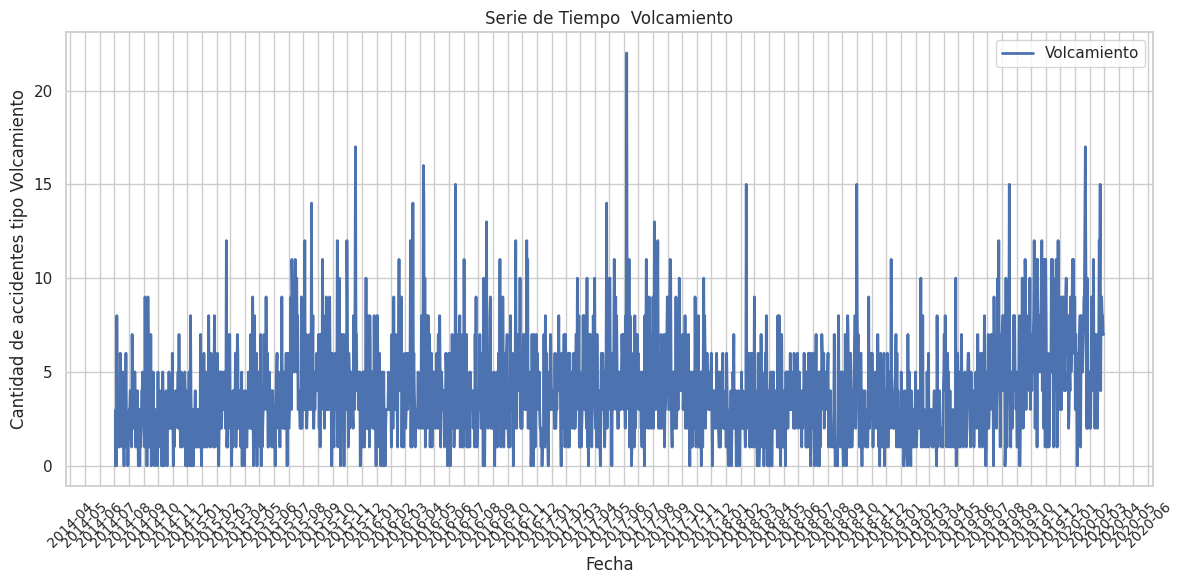

In [44]:
data_pred['Fecha'] = pd.to_datetime(data_pred['Anio'].astype(str) + '-' + data_pred['Mes'].astype(str) + '-' + data_pred['Dia'].astype(str), format='%Y-%m-%d')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data_pred['Fecha'] = pd.to_datetime(data_pred['Fecha'])

# Filtrar datos hasta febrero de 2020
data_pred_filtered = data_pred[data_pred['Fecha'] <= '2020-02-29']

# Ordenar el DataFrame por la columna 'Fecha' si no está ordenado
data_pred_filtered.sort_values(by='Fecha', inplace=True)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Formatear el eje x para mostrar año y mes
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Gráfica de la serie de tiempo
plt.plot(data_pred_filtered['Fecha'], data_pred_filtered['Volcamiento'], label='Volcamiento', color='b', linewidth=2)

# Configurar etiquetas y título
plt.title('Serie de Tiempo  Volcamiento')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de accidentes tipo Volcamiento')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas para mayor legibilidad
ax.xaxis.set_tick_params(labelsize=10)  # Tamaño de fuente para fechas en el eje x
plt.tight_layout()

# Mostrar la gráfica
plt.show()

A simple vista se ve un comportamiento bastante similar en cada una de las estaciones del año, donde hay presencia normal de picos y descensos, pero se ve a simple vista un aumento en este tipo de accidentes en los últimos meses de los registros, se ve como a partir de mayo de 2019 el número empieza a ser cada vez mayor en comparación con los otros periodos de los otros años. Para ver a mayor detalle vamos a ver el número de volcamientos por mes, de cada año.

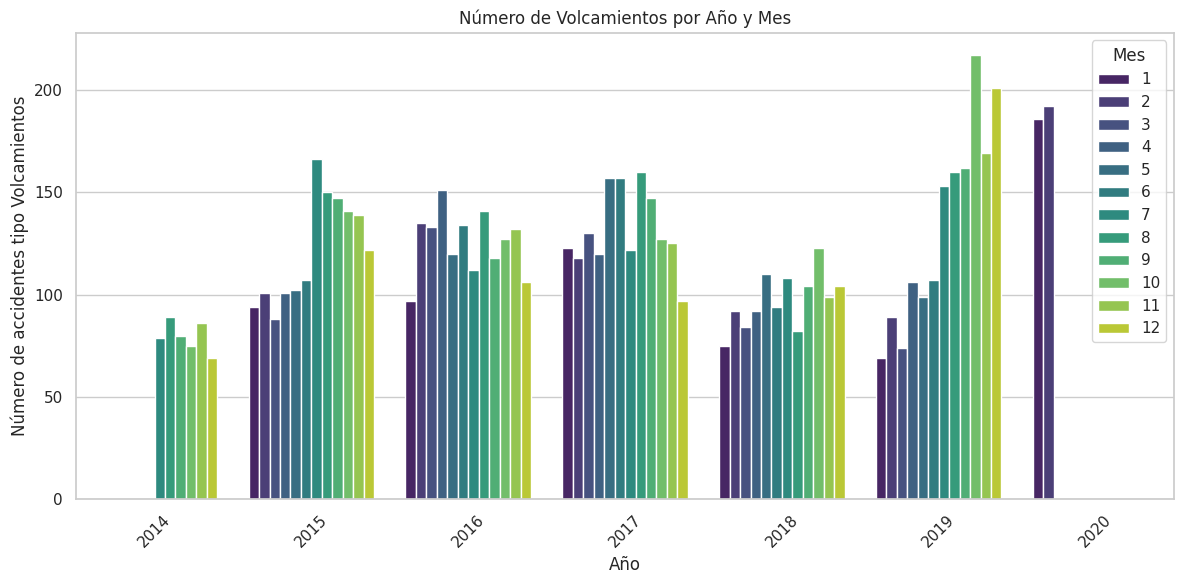

In [50]:
data_pred_mes = data_pred.groupby(['Anio', 'Mes']).agg({'Atropello': 'sum', 'Choque': 'sum', 'Volcamiento': 'sum','Incendio':'sum','Otro':'sum','Caida Ocupante':'sum'}).reset_index()
# Asegúrate de que las columnas de año y mes estén en formato numérico
data_pred_mes['Anio'] = pd.to_numeric(data_pred_mes['Anio'])
data_pred_mes['Mes'] = pd.to_numeric(data_pred_mes['Mes'])

# Utiliza la paleta de colores "viridis"
colors = sns.color_palette("viridis", len(data_pred_mes['Mes'].unique()))

# Gráfico de barras
plt.figure(figsize=(12, 6))

# Utiliza barplot para crear la gráfica con la paleta de colores "viridis"
ax = sns.barplot(x='Anio', y='Volcamiento', hue='Mes', data=data_pred_mes, palette=colors)

# Ajustes visuales
plt.title('Número de Volcamientos por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Número de accidentes tipo Volcamientos')
plt.xticks(rotation=45)

# Muestra la gráfica
plt.tight_layout()
plt.show()

En esta gráfica podemos observar que en 2019 es muy irregular el número de accidentes con respecto a los otros años, en general se ve que los primeros meses del año hay menores casos de accidentes y que ese patron viene de diciembre del año anterior, pero en general el comportamiento no muestra una tendencia clara con la que uno pueda decir fijo en estos meses hay más o menos accidentes, pero analizando 2019 y los primeros dos meses de 2020, que son los datos de validación si se ve un aumento muy significativo de accidentes con respecto a los otros, años. Por ejemplo nuestro conjunto de entrenamiento por lo general va entender que el patrón en los meses de Enero y Febrero va ser  un aumento pero presentando un número de accidentes menor al de los otros meses, y esto no sucede en 2020, donde inclusive el número de accidentes para Enero y Febrero fue mayor a cualquiere mes de 2018 hacía atrás. Esto mismo sucede para Octubre, Noviembre y Diciembre. Al ser estos meses parte de los datos de validación es poco probable que un modelo sea capaz de predecir con exactitud esos datos, donde los comportamientos han mostrados números diferentes. Y es por esos que se ve esa diferencia porcentual tan grande entre el error de entrenamiento y el error de validación.

En base a este análisis podemos identificar que la diferencia porcentual tan grande entre el MSE, MAE de entrenamiento con el de validación es por la diferencia que hay entre los datos de entrenamiento y los datos de validación, ya que hay un aumento en el número de accidentes ocurridos en los últimos periodos de tiempo que se dejaron para validación con respecto a los periodos de tiempo que se dejaron para entrenamiento, con esto es muy poco probable que el modelo contruido en base a la variables elegidas tenga buena generalización de los valores futuros.

Solución: En base al contexto del modelo, donde no únicamente se está teniendo la fecha,  como principal variable de relación, sino que además se consideran otras variables que se deducen a partir de esta, como es el caso del día de la semana, si es un día festivo, si es un fin de semana, que en el contexto de los datos claramente afectan claramente la accidentalidad, ya que el transporte de personas y la alta afluencia de vehículos es diferente, se van hacer una división de datos con el train_test_split: ¿Por qué?:

1- Si bien el modelo se puede ver como una serie de tiempo, es decir que solo relaciona consecutivamente de manera temporal, al agregar nuevas variables, el modelo se entiende de manera distinta ya que entran en juego otro tipo de relaciones mencionadas anteriormente.

2- Acá la forma en como se busca generalizar esta más ligada a que en un periodo de tiempo en especifico de un año, haya cierta relación con el mismo periodo en otro año donde se tengan características similares.

3- No se identifican patrones de tendencias positivas y negativas constantes en las series de tiempo, si bien en los últimos periodos se veían un aumento en el número de accidentes, a partir de los datos históricos no se tiene total certeza que la tendencia siga siendo creciente en los proximos periodos. De igual forma para dar peso a aumentos anuales y mensuales, se tienen en cuenta el Año y el mes.

Por lo tanto se va a dividir el conjunto de datos en 80% entrenamiento y 20% validación. Y con el a partir de la relación media y varianza se va elegir que modelo de GLM ajustar.

In [51]:
data_pred = data_pred.drop('Fecha',axis=1)
data_split = data_pred.copy()

In [52]:
data_split = data_split[['Anio','Mes','Dia','NombreDia','FechaEspecial','FindeSemana','DiaAnio','Atropello','Choque','Volcamiento','Incendio','Otro','Caida Ocupante']]
data_split = pd.get_dummies(data_split, columns=['NombreDia','Mes'],prefix=['Dia','Mes'],drop_first=True)
data_split

,Anio,Dia,FechaEspecial,FindeSemana,DiaAnio,Atropello,Choque,Volcamiento,Incendio,Otro,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,2014,4,0,0,185,0,23,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014,5,0,1,186,25,64,3,0,7,...,0,0,0,0,1,0,0,0,0,0
2,2014,6,0,1,187,16,41,0,0,12,...,0,0,0,0,1,0,0,0,0,0
3,2014,7,0,0,188,10,110,8,0,21,...,0,0,0,0,1,0,0,0,0,0
4,2014,8,0,0,189,7,84,3,0,14,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,2020,25,0,0,56,19,96,9,0,15,...,0,0,0,0,0,0,0,0,0,0
2063,2020,26,0,0,57,14,88,8,0,13,...,0,0,0,0,0,0,0,0,0,0
2064,2020,27,0,0,58,14,91,8,0,14,...,0,0,0,0,0,0,0,0,0,0
2065,2020,28,0,0,59,12,68,7,0,13,...,0,0,0,0,0,0,0,0,0,0


In [53]:
media = data_split['Volcamiento'].mean()
varianza = data_split['Volcamiento'].var()
# Calcula la relación varianza-media
relacion_varianza_media = varianza / media
# Imprime el resultado
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Relación Varianza-Media: {relacion_varianza_media}")

Media: 3.9554910498306723
Varianza: 7.12773725875335
Relación Varianza-Media: 1.8019854346677073


In [54]:
from sklearn.model_selection import train_test_split
data_tr, data_vl = train_test_split(data_split, train_size=0.8, random_state=20)

In [55]:
data_train_3 = data_tr.drop(['Choque','Atropello','Incendio','Otro','Caida Ocupante'],axis=1)
data_val_3 = data_vl.drop(['Choque','Atropello','Incendio','Otro','Caida Ocupante'],axis=1)

In [56]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = data_train_3.drop(['Volcamiento'], axis=1)
y = data_train_3['Volcamiento']
X_val = data_val_3.drop(['Volcamiento'], axis=1)
y_val = data_val_3['Volcamiento']

poisson_model_3 = PoissonRegressor(max_iter=1000)
poisson_model_3.fit(X, y)

y_pred_train = poisson_model_3.predict(X)

mae_train_volcamiento = mean_absolute_error(y, y_pred_train)
mse_train_volcamiento = mean_squared_error(y, y_pred_train)

y_pred_val = poisson_model_3.predict(X_val)

mae_val_volcamiento = mean_absolute_error(y_val, y_pred_val)
mse_val_volcamiento = mean_squared_error(y_val, y_pred_val)

mae_difference_percentage_volcamiento = ((mae_val_volcamiento - mae_train_volcamiento) / mae_val_volcamiento) * 100

mse_difference_percentage_volcamiento = ((mse_val_volcamiento-mse_train_volcamiento) / mse_val_volcamiento) * 100

# Imprimir los resultados
print(f'MAE de entrenamiento: {mae_train_volcamiento}')
print(f'MAE de validación: {mae_val_volcamiento}')
print(f'Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: {mae_difference_percentage_volcamiento:.2f}%')
print(f'MSE de entrenamiento: {mse_train_volcamiento}')
print(f'MSE de validación: {mse_val_volcamiento}')
print(f'Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: {mse_difference_percentage_volcamiento:.2f}%')

MAE de entrenamiento: 2.0114776415992
MAE de validación: 2.006557675455077
Diferencia Porcentual entre MAE de Entrenamiento y MAE de Validación: -0.25%
MSE de entrenamiento: 6.841769871006984
MSE de validación: 7.099471166446352
Diferencia Porcentual entre MSE de Entrenamiento y MSE de Validación: 3.63%


In [57]:
coeficientes_modelo_volcamiento = pd.DataFrame({'Variable': X.columns, 'Coeficiente': poisson_model_3.coef_})
intercepto_row = pd.DataFrame({'Variable': 'Intercepto', 'Coeficiente': poisson_model_3.intercept_}, index=[0])
coeficientes_modelo_volcamiento = pd.concat([intercepto_row, coeficientes_modelo_volcamiento], ignore_index=True)
coeficientes_modelo_volcamiento

,Variable,Coeficiente
0,Intercepto,-58.259365
1,Anio,0.029523
2,Dia,0.000960
3,FechaEspecial,0.008526
4,FindeSemana,-0.058246
5,DiaAnio,0.000497
6,Dia_Jueves,0.028017
7,Dia_Lunes,-0.020936
8,Dia_Martes,0.025875
9,Dia_Miércoles,0.015216


In [58]:
from datetime import datetime, timedelta

# Define la fecha de inicio y fin
fecha_inicio = datetime(2019, 3, 1)
fecha_fin = datetime(2023, 12, 31)

# Crea una lista de fechas usando un bucle while
fechas = []
current_date = fecha_inicio

while current_date <= fecha_fin:
    fechas.append({
        'Anio': current_date.year,
        'Mes': current_date.month,
        'Dia': current_date.day
    })
    current_date += timedelta(days=1)

# Convierte la lista de diccionarios en un DataFrame
data_prediccion = pd.DataFrame(fechas)
data_view = data_prediccion.copy()
data_prediccion

,Anio,Mes,Dia
0,2019,3,1
1,2019,3,2
2,2019,3,3
3,2019,3,4
4,2019,3,5
...,...,...,...
1762,2023,12,27
1763,2023,12,28
1764,2023,12,29
1765,2023,12,30


In [59]:
data_prediccion['FechaEspecial'] =data_prediccion.apply(lambda fila: 1 if date(fila['Anio'], fila['Mes'], fila['Dia']) in festivos else 0, axis=1)
data_prediccion['NombreDia'] = data_prediccion.apply(calcular_nombre_dia, axis=1)
data_prediccion['FindeSemana'] = data_prediccion.apply(lambda fila: 1 if (fila['NombreDia']=='Sábado' or fila['NombreDia']=='Domingo') else 0,axis=1)
data_prediccion['DiaAnio'] = data_prediccion.apply(lambda fila: pd.Timestamp(fila['Anio'], fila['Mes'], fila['Dia']).dayofyear, axis=1)
data_prediccion = pd.get_dummies(data_prediccion, columns=['NombreDia','Mes'],prefix=['Dia','Mes'],drop_first=True)
data_prediccion

,Anio,Dia,FechaEspecial,FindeSemana,DiaAnio,Dia_Jueves,Dia_Lunes,Dia_Martes,Dia_Miércoles,Dia_Sábado,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,2019,1,0,0,60,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2019,2,0,1,61,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2019,3,0,1,62,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2019,4,0,0,63,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2019,5,0,0,64,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2023,27,0,0,361,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1763,2023,28,0,0,362,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1764,2023,29,0,0,363,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1765,2023,30,0,1,364,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [60]:
Prediccion_atropellos = poisson_model_1.predict(data_prediccion)
Prediccion_choque  = gamma_model.predict(data_prediccion)
Prediccion_caida = poisson_model_2.predict(data_prediccion)
Prediccion_volcamiento = poisson_model_3.predict(data_prediccion)

In [61]:
data_view['Predic_atropello'] = Prediccion_atropellos
data_view['Predic_choque'] = Prediccion_choque
data_view['Predic_caida'] = Prediccion_caida
data_view['Predic_volcamiento'] = Prediccion_volcamiento
data_view

,Anio,Mes,Dia,Predic_atropello,Predic_choque,Predic_caida,Predic_volcamiento
0,2019,3,1,10.927272,78.444391,10.172421,3.872113
1,2019,3,2,10.718011,71.502386,9.199671,3.660097
2,2019,3,3,10.060678,70.028636,8.893626,3.639826
3,2019,3,4,10.317110,75.948486,10.560593,3.783702
4,2019,3,5,10.305412,78.020091,10.324639,3.970814
...,...,...,...,...,...,...,...
1762,2023,12,27,9.671173,83.122384,9.829329,5.322618
1763,2023,12,28,9.567120,82.469818,9.813171,5.399049
1764,2023,12,29,10.155424,84.056040,9.755786,5.291997
1765,2023,12,30,9.960945,76.617427,8.822877,5.002236


In [62]:
data_view['Predic_atropello'] = data_view['Predic_atropello'].round()
data_view['Predic_choque'] = data_view['Predic_choque'].round()
data_view['Predic_caida'] = data_view['Predic_caida'].round()
data_view['Predic_volcamiento'] = data_view['Predic_volcamiento'].round()
data_view

,Anio,Mes,Dia,Predic_atropello,Predic_choque,Predic_caida,Predic_volcamiento
0,2019,3,1,11.0,78.0,10.0,4.0
1,2019,3,2,11.0,72.0,9.0,4.0
2,2019,3,3,10.0,70.0,9.0,4.0
3,2019,3,4,10.0,76.0,11.0,4.0
4,2019,3,5,10.0,78.0,10.0,4.0
...,...,...,...,...,...,...,...
1762,2023,12,27,10.0,83.0,10.0,5.0
1763,2023,12,28,10.0,82.0,10.0,5.0
1764,2023,12,29,10.0,84.0,10.0,5.0
1765,2023,12,30,10.0,77.0,9.0,5.0


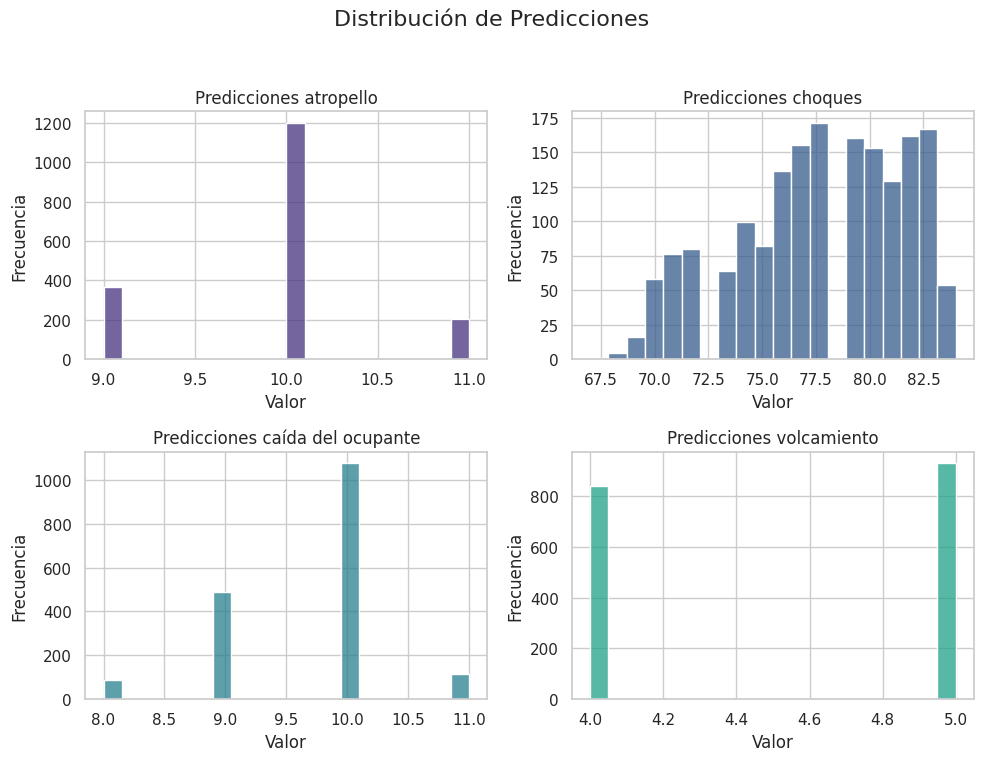

In [65]:
# Configurar el estilo 'viridis' de Seaborn
sns.set_palette("viridis")

# Crear el subplot para los histogramas
num_columns = 2
num_rows = 2
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 8))

# Iterar a través de las columnas y crear un histograma para cada una
columns_to_plot = ['Predic_atropello', 'Predic_choque', 'Predic_caida', 'Predic_volcamiento']
titles = ['Predicciones atropello', 'Predicciones choques', 'Predicciones caída del ocupante', 'Predicciones volcamiento']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // num_columns, i % num_columns]

    # Usar un color diferente de la paleta 'viridis' para cada histograma
    sns.histplot(data_view[col], bins=20, color=sns.color_palette("viridis")[i], ax=ax)

    ax.set_title(titles[i])
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño del gráfico
plt.suptitle('Distribución de Predicciones', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Eliminar ejes vacíos
for i in range(len(columns_to_plot), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Mostrar el gráfico
plt.show()

In [68]:
# Selecciona las 4 columnas de interés
columns_to_describe = ['Predic_atropello', 'Predic_choque', 'Predic_caida', 'Predic_volcamiento']

# Calcula las estadísticas descriptivas
statistics = data_view[columns_to_describe].describe()

# Transpone el DataFrame para tener las columnas como índice
statistics = statistics.T

# Muestra el DataFrame con las estadísticas descriptivas
statistics


,count,mean,std,min,25%,50%,75%,max
Predic_atropello,1767.0,9.906621,0.558874,9.0,10.0,10.0,10.0,11.0
Predic_choque,1767.0,77.773628,3.932287,67.0,75.0,78.0,81.0,84.0
Predic_caida,1767.0,9.689304,0.668168,8.0,9.0,10.0,10.0,11.0
Predic_volcamiento,1767.0,4.525184,0.499507,4.0,4.0,5.0,5.0,5.0


In [ ]:
#data_view.to_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/Predicciones2019-2023.csv', index=False)

In [ ]:
data_view

,Anio,Mes,Dia,Predic_atropello,Predic_choque,Predic_caida,Predic_volcamiento
0,2019,3,1,11.0,78.0,10.0,4.0
1,2019,3,2,11.0,72.0,9.0,4.0
2,2019,3,3,10.0,70.0,9.0,4.0
3,2019,3,4,10.0,76.0,11.0,4.0
4,2019,3,5,10.0,78.0,10.0,4.0
...,...,...,...,...,...,...,...
1762,2023,12,27,10.0,83.0,10.0,5.0
1763,2023,12,28,10.0,82.0,10.0,5.0
1764,2023,12,29,10.0,84.0,10.0,5.0
1765,2023,12,30,10.0,77.0,9.0,5.0


# ***AGRUPAMIENTO***

In [71]:
data = pd.read_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/DatosHistoricos.csv', sep=',', low_memory=False)
data

,Anio,Tipo,Diseno,Gravedad,Mes,NroComuna,Barrio,Dia,longitud,latitud
0,2015,Caida Ocupante,Tramo de via,Con heridos,10,10,Barrio Colón,21,-75.568801,6.243123
1,2015,Choque,Tramo de via,Solo danos,11,10,San Diego,5,-75.569388,6.228700
2,2015,Otro,Tramo de via,Con heridos,10,2,La Francia,21,-75.550391,6.298695
3,2015,Atropello,Tramo de via,Con heridos,10,1,Santo Domingo Savio No.1,21,-75.544220,6.300194
4,2015,Choque,Tramo de via,Solo danos,11,15,Santa Fé,3,-75.578181,6.216992
...,...,...,...,...,...,...,...,...,...,...
250724,2017,Atropello,Lote o Predio,Con heridos,4,9,Loreto,21,-75.555946,6.232600
250725,2017,Caida Ocupante,Lote o Predio,Con heridos,3,11,Cuarta Brigada,10,-75.585152,6.260449
250726,2017,Choque,Tramo de via,Solo danos,3,5,Francisco Antonio Zea,10,-75.571359,6.284578
250727,2017,Caida Ocupante,Tramo de via,Con heridos,3,6,Kennedy,10,-75.583113,6.289575


Seleccionamos las variables de mayor interés para el agrupamiento

In [72]:
data= data[['Barrio','Tipo','Gravedad','Diseno']]
data = data.sort_values(by='Barrio', ascending=True)
data

,Barrio,Tipo,Gravedad,Diseno
112314,Aguas Frias,Otro,Con heridos,Lote o Predio
85305,Aguas Frias,Atropello,Con heridos,Tramo de via
80306,Aguas Frias,Caida Ocupante,Con heridos,Tramo de via
203836,Aguas Frias,Choque,Solo danos,Tramo de via
171310,Aguas Frias,Otro,Con heridos,Lote o Predio
...,...,...,...,...
92554,Área de Expansión San Antonio de Prado,Volcamiento,Con heridos,Tramo de via
100513,Área de Expansión San Antonio de Prado,Otro,Con heridos,Lote o Predio
110097,Área de Expansión San Antonio de Prado,Choque,Con heridos,Tramo de via
20078,Área de Expansión San Antonio de Prado,Choque,Con heridos,Tramo de via


In [73]:
data['Diseno'].value_counts()

Tramo de via     173893
Interseccion      42329
Lote o Predio     24019
Glorieta           6354
Paso Elevado       1315
Puente              967
Ciclo Ruta          962
Paso Inferior       643
Paso a Nivel        113
Via peatonal         54
Tunel                51
Ponton               29
Name: Diseno, dtype: int64

Como habíamos visto en el análisis inicial hay variables que tienen categorias con muy pocos registros, que en comparación con las otras categorías podrían no estar mostrando información relevante para los grupos de representación. Por lo que se van hacer algunas modificaciones.

En el tipo de accidentes: La categoria incendio se va agrupar en Otro.
En el Diseno del lugar donde ocurrio el accidente, se van agrupar las categorias Paso Inferior, Paso a Nivel, Via peatonal, Tunel, Ponton. En una sola que diga Otro tipo de disenos.

In [74]:
data['Tipo'] = data['Tipo'].replace('Incendio', 'Otro')
data['Diseno'] = data['Diseno'].replace(['Paso Inferior','Paso a Nivel','Via peatonal','Tunel','Ponton'], 'Otro tipo de disenos')

In [75]:
len(data['Barrio'].value_counts())

326

In [76]:
agrupado = data.groupby(['Barrio', 'Tipo'])['Tipo'].count().reset_index(name='Numero de Accidentes')
# Pivota la tabla para que los barrios sean filas, las categorías sean columnas y los valores sean el número de accidentes
pivoteado = agrupado.pivot(index='Barrio', columns='Tipo', values='Numero de Accidentes').reset_index()
pivoteado = pivoteado.fillna(0)
pivoteado

Tipo,Barrio,Atropello,Caida Ocupante,Choque,Otro,Volcamiento
0,Aguas Frias,19.0,8.0,36.0,19.0,6.0
1,Aldea Pablo VI,25.0,17.0,36.0,5.0,4.0
2,Alejandro Echavarría,109.0,113.0,605.0,146.0,60.0
3,Alejandría,18.0,19.0,542.0,38.0,15.0
4,Alfonso López,153.0,185.0,568.0,193.0,69.0
...,...,...,...,...,...,...
321,Yolombo,1.0,0.0,26.0,7.0,2.0
322,Área de Expansión Altavista,2.0,1.0,5.0,1.0,2.0
323,Área de Expansión Altos de Calasanz,8.0,9.0,80.0,13.0,3.0
324,Área de Expansión Pajarito,123.0,174.0,453.0,203.0,76.0


In [77]:
agrupado_2 = data.groupby(['Barrio', 'Gravedad'])['Gravedad'].count().reset_index(name='Numero de Accidentes')
# Pivota la tabla para que los barrios sean filas, las categorías sean columnas y los valores sean el número de accidentes
pivoteado_2 = agrupado_2.pivot(index='Barrio', columns='Gravedad', values='Numero de Accidentes').reset_index()
pivoteado_2 = pivoteado_2.fillna(0)
pivoteado_2

Gravedad,Barrio,Con heridos,Con muertos,Solo danos
0,Aguas Frias,66.0,0.0,22.0
1,Aldea Pablo VI,66.0,1.0,20.0
2,Alejandro Echavarría,720.0,5.0,308.0
3,Alejandría,198.0,1.0,433.0
4,Alfonso López,817.0,5.0,346.0
...,...,...,...,...
321,Yolombo,22.0,0.0,14.0
322,Área de Expansión Altavista,11.0,0.0,0.0
323,Área de Expansión Altos de Calasanz,59.0,1.0,53.0
324,Área de Expansión Pajarito,783.0,9.0,237.0


In [78]:
agrupado_3 = data.groupby(['Barrio', 'Diseno'])['Diseno'].count().reset_index(name='Numero de Accidentes')
# Pivota la tabla para que los barrios sean filas, las categorías sean columnas y los valores sean el número de accidentes
pivoteado_3 = agrupado_3.pivot(index='Barrio', columns='Diseno', values='Numero de Accidentes').reset_index()
pivoteado_3 = pivoteado_3.fillna(0)
pivoteado_3

Diseno,Barrio,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via
0,Aguas Frias,0.0,0.0,2.0,14.0,0.0,0.0,0.0,72.0
1,Aldea Pablo VI,0.0,0.0,1.0,15.0,0.0,0.0,0.0,71.0
2,Alejandro Echavarría,3.0,20.0,193.0,147.0,1.0,0.0,0.0,669.0
3,Alejandría,1.0,4.0,96.0,88.0,1.0,0.0,1.0,441.0
4,Alfonso López,9.0,0.0,161.0,158.0,1.0,0.0,0.0,839.0
...,...,...,...,...,...,...,...,...,...
321,Yolombo,0.0,0.0,0.0,4.0,0.0,0.0,0.0,32.0
322,Área de Expansión Altavista,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0
323,Área de Expansión Altos de Calasanz,0.0,0.0,4.0,23.0,0.0,0.0,0.0,86.0
324,Área de Expansión Pajarito,1.0,0.0,101.0,224.0,5.0,0.0,1.0,697.0


In [80]:
data_grouping = pivoteado.merge(pivoteado_2, on='Barrio', how='inner')
data_grouping = data_grouping.merge(pivoteado_3, on='Barrio', how='inner')
data_grouping

,Barrio,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via
0,Aguas Frias,19.0,8.0,36.0,19.0,6.0,66.0,0.0,22.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,72.0
1,Aldea Pablo VI,25.0,17.0,36.0,5.0,4.0,66.0,1.0,20.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,71.0
2,Alejandro Echavarría,109.0,113.0,605.0,146.0,60.0,720.0,5.0,308.0,3.0,20.0,193.0,147.0,1.0,0.0,0.0,669.0
3,Alejandría,18.0,19.0,542.0,38.0,15.0,198.0,1.0,433.0,1.0,4.0,96.0,88.0,1.0,0.0,1.0,441.0
4,Alfonso López,153.0,185.0,568.0,193.0,69.0,817.0,5.0,346.0,9.0,0.0,161.0,158.0,1.0,0.0,0.0,839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Yolombo,1.0,0.0,26.0,7.0,2.0,22.0,0.0,14.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,32.0
322,Área de Expansión Altavista,2.0,1.0,5.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0
323,Área de Expansión Altos de Calasanz,8.0,9.0,80.0,13.0,3.0,59.0,1.0,53.0,0.0,0.0,4.0,23.0,0.0,0.0,0.0,86.0
324,Área de Expansión Pajarito,123.0,174.0,453.0,203.0,76.0,783.0,9.0,237.0,1.0,0.0,101.0,224.0,5.0,0.0,1.0,697.0


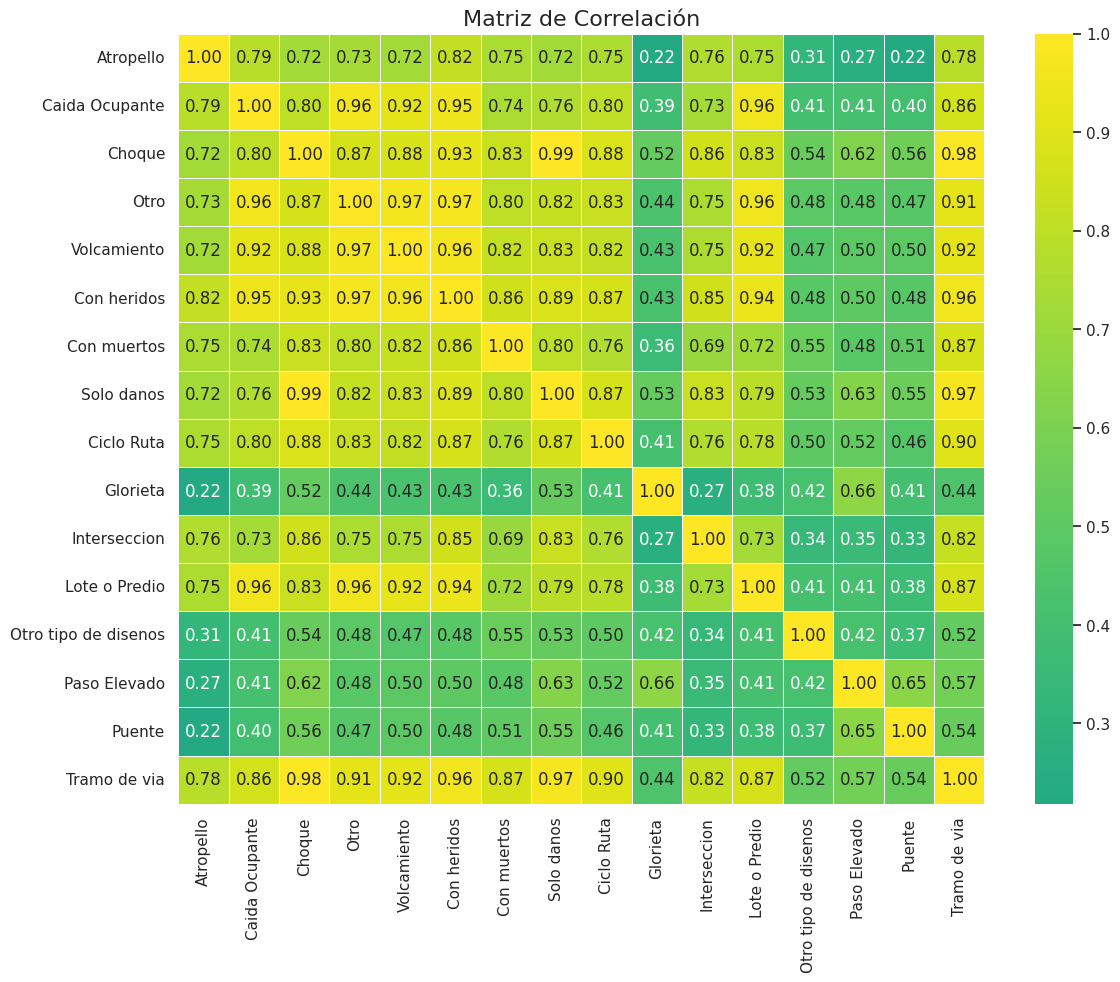

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = data_grouping.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [82]:
data_grouping.set_index('Barrio', inplace=True)

In [83]:
data_grouping.describe()

,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,73.730061,66.088957,519.567485,81.957055,27.763804,420.935583,4.245399,343.926380,2.950920,19.490798,129.843558,73.677914,2.730061,4.033742,2.966258,533.414110
std,93.907618,71.378523,731.903815,91.238511,30.797743,470.761712,6.230043,525.159464,4.337747,74.219414,180.645825,75.664587,11.474151,15.822343,9.947961,694.294593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,13.000000,51.500000,15.000000,6.000000,73.500000,0.000000,33.250000,0.000000,0.000000,7.250000,15.250000,0.000000,0.000000,0.000000,89.500000
50%,49.000000,44.000000,252.000000,51.000000,18.000000,274.000000,2.000000,155.500000,1.000000,0.000000,63.000000,51.500000,0.000000,0.000000,0.000000,303.500000
75%,99.750000,98.500000,619.250000,120.250000,39.000000,616.750000,5.000000,405.000000,4.000000,3.000000,173.000000,109.000000,1.000000,1.000000,1.000000,697.000000
max,1007.000000,410.000000,4130.000000,538.000000,177.000000,2489.000000,46.000000,3434.000000,33.000000,699.000000,1198.000000,476.000000,127.000000,176.000000,82.000000,4335.000000


In [84]:
from sklearn import preprocessing
# Supongamos que tienes un DataFrame llamado data_grouping
datak = data_grouping.copy()  # Copia los datos originales

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a tus datos y normaliza
datak[datak.columns] = scaler.fit_transform(datak[datak.columns])

# Divide los datos en conjuntos de entrenamiento y validación
X_train, X_val = train_test_split(datak, test_size=0.1, random_state=1983)
X_cl = X_train.copy()
X_clv = X_val.copy()

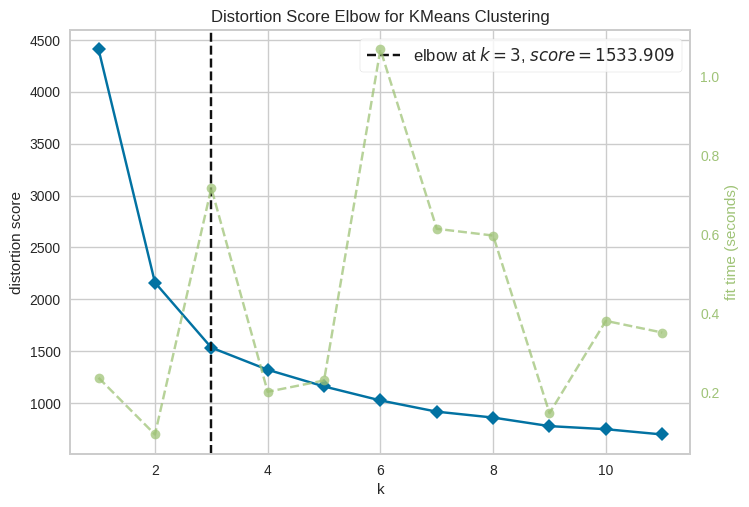

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans(random_state=88)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X_train)
visualizer.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

def generar_silueta(X_train, n_clusters):
    # Ajusta el modelo K-Means con el número de clústeres especificado
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=88)
    cluster_labels = model.fit_predict(X_train)

    # Calcula el puntaje promedio de la silueta
    silhouette_avg = silhouette_score(X_train, cluster_labels)

    # Calcula los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    # Crea una figura similar a la original
    plt.figure(figsize=(9, 5))

    # Establece los límites de los ejes
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_train) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Define un color personalizado
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Rellena el área bajo la curva de silueta con el color personalizado
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Etiqueta la curva de silueta con el número de clúster
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    # Título y etiquetas de los ejes
    plt.title(f"Silhouette analysis for KMeans clustering with {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    # Línea vertical para el puntaje promedio de la silueta
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Etiqueta para el puntaje promedio de la silueta
    plt.text(silhouette_avg + 0.02, 5, f'Average Silhouette Score: {silhouette_avg:.4f}', color="red")

    # Elimina las etiquetas/ticks del eje y
    plt.yticks([])

    # Establece los ticks del eje x
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Muestra la gráfica
    plt.show()

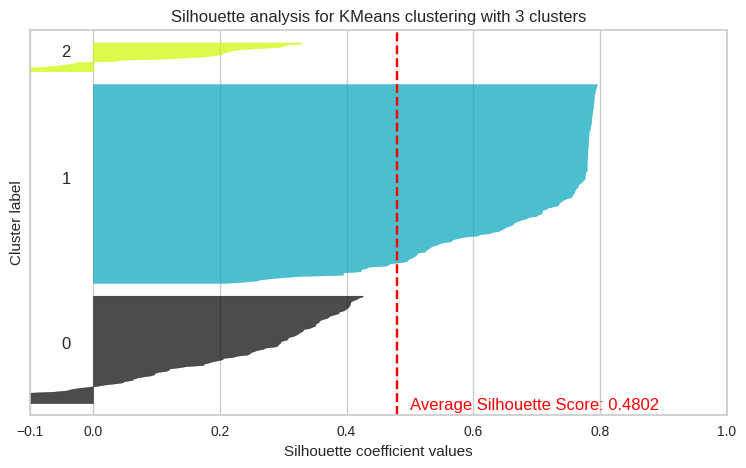

In [87]:
generar_silueta(X_train, 3)

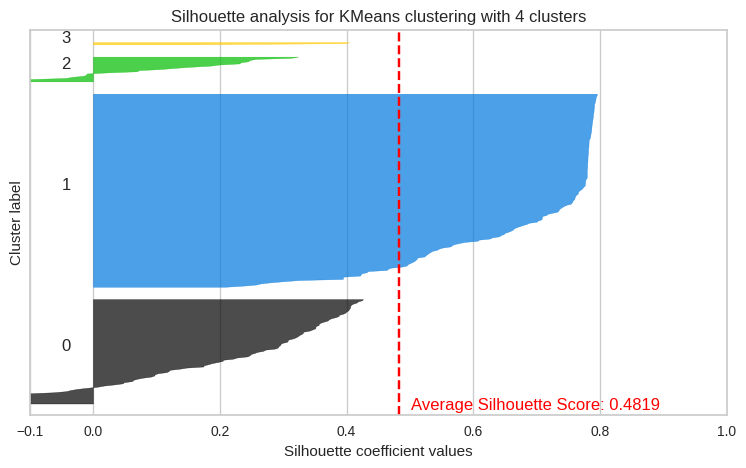

In [88]:
generar_silueta(X_train, 4)

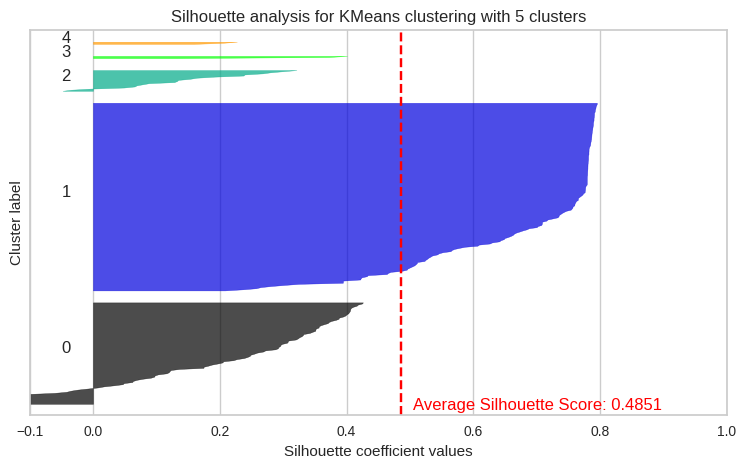

In [89]:
generar_silueta(X_train, 5)

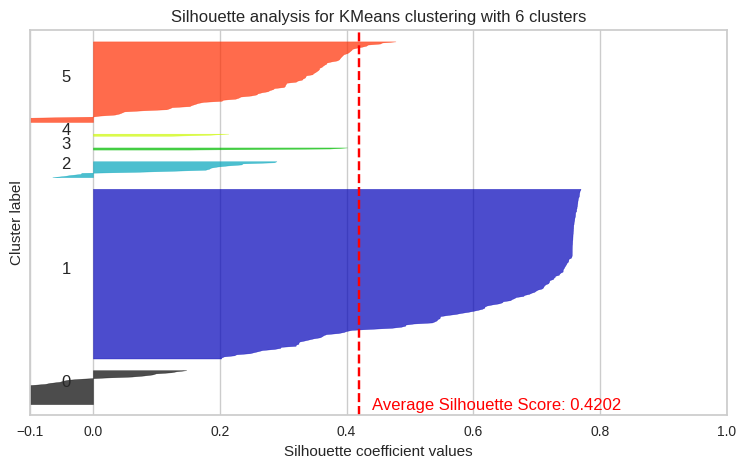

In [90]:
generar_silueta(X_train, 6)

In [91]:
# Ajusta K-Means con el número óptimo de clústeres en los datos de entrenamiento
kmeans = KMeans(n_clusters=5,n_init = 'auto', random_state=88)
kmeans.fit(X_train)

KMeans(n_clusters=5, n_init='auto', random_state=88)

In [92]:
y_lab = kmeans.fit_predict(X_train)
pd.crosstab(y_lab,'Conteo')

col_0,Conteo
row_0,
0,94
1,173
2,20
3,3
4,3


In [93]:
labels = kmeans.labels_
# Asigna las etiquetas de clúster a tu DataFrame original 'data_grouping'.
X_cl['Cluster'] = labels

In [94]:
X_cl['Cluster'].value_counts()

1    173
0     94
2     20
3      3
4      3
Name: Cluster, dtype: int64

In [95]:
clusters_val = kmeans.predict(X_clv)
# Agrega la información de los clústeres a tus datos de validación
X_clv['Cluster'] = clusters_val

In [96]:
X_clv['Cluster'].value_counts()

1    19
0    11
4     2
2     1
Name: Cluster, dtype: int64

In [97]:
data_cluster = pd.concat([X_cl, X_clv], ignore_index=False)
data_cluster

,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Cluster
Barrio,,,,,,,,,,,,,,,,,
Area De Expansion Altavista,-0.743680,-0.843129,-0.693187,-0.866722,-0.837834,-0.848728,-0.682487,-0.644463,-0.681335,-0.263014,-0.714335,-0.909058,-0.238297,-0.255332,-0.298636,-0.737728,1
Robledo,0.301503,1.977173,0.168905,1.394567,1.796272,0.993671,0.764346,0.005862,-0.219557,-0.263014,0.172738,1.632358,-0.151011,-0.192033,-0.298636,0.502844,0
Nuevos Conquistadores,-0.509047,-0.702816,-0.665819,-0.713042,-0.740275,-0.740227,-0.521728,-0.612042,-0.681335,-0.263014,-0.686614,-0.684037,-0.238297,-0.255332,-0.298636,-0.669929,1
El Corazón,-0.477052,-0.674753,-0.606978,-0.724019,-0.772795,-0.676402,-0.360969,-0.583436,-0.450446,-0.263014,-0.653349,-0.856112,-0.238297,-0.255332,-0.298636,-0.594918,1
Fuente Clara,-0.594369,-0.674753,-0.579610,-0.614248,-0.610196,-0.599813,-0.360969,-0.606321,-0.450446,-0.263014,-0.642260,-0.657564,-0.151011,-0.255332,0.003397,-0.590590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Los Cerros El Vergel,-0.402396,-0.604596,-0.522137,-0.427637,-0.577676,-0.550881,-0.360969,-0.491894,-0.450446,-0.263014,-0.481478,-0.591381,-0.238297,-0.255332,-0.298636,-0.514136,1
San Antonio,-0.690355,-0.829098,-0.694555,-0.822814,-0.870354,-0.827454,-0.682487,-0.648277,-0.681335,-0.263014,-0.714335,-0.882585,-0.238297,-0.255332,-0.298636,-0.729072,1
La Francia,0.066870,-0.225750,-0.460559,-0.493500,-0.350037,-0.378555,-0.682487,-0.419424,0.242221,-0.141566,-0.514744,-0.419306,-0.238297,0.061163,-0.298636,-0.379981,1


In [98]:
data_cluster['Cluster'] = data_cluster['Cluster'] + 1

In [99]:
data_cluster['Cluster'].value_counts()

2    192
1    105
3     21
5      5
4      3
Name: Cluster, dtype: int64

In [100]:
data_cluster = data_cluster['Cluster']

In [101]:
data_cluster

Barrio
Area De Expansion Altavista    2
Robledo                        1
Nuevos Conquistadores          2
El Corazón                     2
Fuente Clara                   2
                              ..
Los Cerros El Vergel           2
San Antonio                    2
La Francia                     2
Palermo                        2
Campo Valdés No.1              1
Name: Cluster, Length: 326, dtype: int32

In [102]:
data_cluster = pd.DataFrame({'Barrio': data_cluster.index, 'Cluster': data_cluster.values})
data_cluster

,Barrio,Cluster
0,Area De Expansion Altavista,2
1,Robledo,1
2,Nuevos Conquistadores,2
3,El Corazón,2
4,Fuente Clara,2
...,...,...
321,Los Cerros El Vergel,2
322,San Antonio,2
323,La Francia,2
324,Palermo,2


In [103]:
data_cluster = data_cluster.sort_values(by='Barrio', ascending=True)
data_cluster['Cluster'].value_counts()

2    192
1    105
3     21
5      5
4      3
Name: Cluster, dtype: int64

In [104]:
data_cluster

,Barrio,Cluster
189,Aguas Frias,2
260,Aldea Pablo VI,2
167,Alejandro Echavarría,1
99,Alejandría,2
83,Alfonso López,1
...,...,...
53,Yolombo,2
295,Área de Expansión Altavista,2
107,Área de Expansión Altos de Calasanz,2
206,Área de Expansión Pajarito,1


In [105]:
data_cluster = data_cluster.merge(data_grouping, on='Barrio', how='inner')

In [106]:
data_cluster['Total de accidentes'] = data_cluster['Con muertos']+ data_cluster['Solo danos']+ data_cluster['Con heridos']
data_cluster

,Barrio,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
0,Aguas Frias,2,19.0,8.0,36.0,19.0,6.0,66.0,0.0,22.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,72.0,88.0
1,Aldea Pablo VI,2,25.0,17.0,36.0,5.0,4.0,66.0,1.0,20.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,71.0,87.0
2,Alejandro Echavarría,1,109.0,113.0,605.0,146.0,60.0,720.0,5.0,308.0,3.0,20.0,193.0,147.0,1.0,0.0,0.0,669.0,1033.0
3,Alejandría,2,18.0,19.0,542.0,38.0,15.0,198.0,1.0,433.0,1.0,4.0,96.0,88.0,1.0,0.0,1.0,441.0,632.0
4,Alfonso López,1,153.0,185.0,568.0,193.0,69.0,817.0,5.0,346.0,9.0,0.0,161.0,158.0,1.0,0.0,0.0,839.0,1168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Yolombo,2,1.0,0.0,26.0,7.0,2.0,22.0,0.0,14.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,32.0,36.0
322,Área de Expansión Altavista,2,2.0,1.0,5.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,11.0
323,Área de Expansión Altos de Calasanz,2,8.0,9.0,80.0,13.0,3.0,59.0,1.0,53.0,0.0,0.0,4.0,23.0,0.0,0.0,0.0,86.0,113.0
324,Área de Expansión Pajarito,1,123.0,174.0,453.0,203.0,76.0,783.0,9.0,237.0,1.0,0.0,101.0,224.0,5.0,0.0,1.0,697.0,1029.0


In [ ]:
#data_cluster.to_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto2/Barrios-cluster.csv', index=False)

In [107]:
cluster_1 = data_cluster[data_cluster['Cluster']==1]
cluster_2 = data_cluster[data_cluster['Cluster']==2]
cluster_3 = data_cluster[data_cluster['Cluster']==3]
cluster_4 = data_cluster[data_cluster['Cluster']==4]
cluster_5 = data_cluster[data_cluster['Cluster']==5]

In [108]:
import plotly.express as px
fig = px.scatter_3d(data_cluster, x='Atropello', y='Con muertos', z='Tramo de via',
              color='Cluster')
fig.show()

In [109]:
cluster_5.describe()

,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.0,351.400000,297.200000,3579.600000,393.600000,135.200000,2161.400000,22.800000,2572.80000,21.800000,295.000000,643.000000,311.600000,29.600000,84.600000,36.200000,3335.200000,4757.000000
std,0.0,370.864935,90.552195,759.677102,138.277981,47.897808,620.848854,5.890671,632.29637,7.395945,342.262326,446.323313,128.028512,19.856989,61.125281,27.049954,1081.893803,1184.571864
min,5.0,96.000000,141.000000,2267.000000,193.000000,64.000000,1053.000000,13.000000,1695.00000,13.000000,3.000000,149.000000,118.000000,12.000000,4.000000,1.000000,1496.000000,2761.000000
25%,5.0,200.000000,295.000000,3593.000000,315.000000,109.000000,2382.000000,22.000000,2338.00000,18.000000,17.000000,371.000000,299.000000,16.000000,77.000000,23.000000,3461.000000,4852.000000
50%,5.0,202.000000,346.000000,3922.000000,453.000000,155.000000,2428.000000,25.000000,2687.00000,22.000000,124.000000,476.000000,329.000000,18.000000,79.000000,32.000000,3571.000000,5091.000000
75%,5.0,252.000000,350.000000,3986.000000,469.000000,171.000000,2455.000000,26.000000,2710.00000,23.000000,632.000000,1021.000000,336.000000,47.000000,87.000000,55.000000,3813.000000,5166.000000
max,5.0,1007.000000,354.000000,4130.000000,538.000000,177.000000,2489.000000,28.000000,3434.00000,33.000000,699.000000,1198.000000,476.000000,55.000000,176.000000,70.000000,4335.000000,5915.000000


In [110]:
cluster_4.describe()

,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.0,182.666667,206.333333,2363.000000,324.333333,95.333333,1510.333333,21.666667,1639.666667,14.333333,203.333333,388.666667,232.333333,101.333333,13.666667,9.000000,2209.000000,3171.666667
std,0.0,8.621678,40.203648,823.526563,81.223970,28.746014,309.034518,2.516611,643.109892,4.509250,181.332108,156.490681,86.604465,29.569128,14.153916,7.549834,864.771068,950.733576
min,4.0,175.000000,160.000000,1557.000000,231.000000,69.000000,1204.000000,19.000000,981.000000,10.000000,84.000000,208.000000,133.000000,69.000000,5.000000,1.000000,1357.000000,2209.000000
25%,4.0,178.000000,193.500000,1943.000000,297.000000,80.000000,1354.500000,20.500000,1326.500000,12.000000,99.000000,342.000000,202.500000,88.500000,5.500000,5.500000,1770.500000,2702.500000
50%,4.0,181.000000,227.000000,2329.000000,363.000000,91.000000,1505.000000,22.000000,1672.000000,14.000000,114.000000,476.000000,272.000000,108.000000,6.000000,10.000000,2184.000000,3196.000000
75%,4.0,186.500000,229.500000,2766.000000,371.000000,108.500000,1663.500000,23.000000,1969.000000,16.500000,263.000000,479.000000,282.000000,117.500000,18.000000,13.000000,2635.000000,3653.000000
max,4.0,192.000000,232.000000,3203.000000,379.000000,126.000000,1822.000000,24.000000,2266.000000,19.000000,412.000000,482.000000,292.000000,127.000000,30.000000,16.000000,3086.000000,4110.000000


In [111]:
cluster_3.describe()

,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,3.0,244.619048,201.714286,2209.714286,268.047619,94.523810,1456.047619,17.857143,1544.714286,11.047619,94.809524,505.000000,217.714286,12.190476,25.857143,19.904762,2132.095238,3018.619048
std,0.0,127.510578,76.465118,518.391854,92.251545,30.024355,391.118969,9.248166,468.929434,4.260002,124.857366,247.890702,79.006419,11.985904,28.027283,18.080113,563.612358,662.649264
min,3.0,59.000000,105.000000,1488.000000,160.000000,50.000000,775.000000,6.000000,717.000000,3.000000,0.000000,189.000000,102.000000,0.000000,0.000000,0.000000,1239.000000,2009.000000
25%,3.0,166.000000,152.000000,1759.000000,196.000000,80.000000,1203.000000,12.000000,1142.000000,8.000000,2.000000,350.000000,157.000000,3.000000,4.000000,6.000000,1687.000000,2397.000000
50%,3.0,210.000000,184.000000,2145.000000,252.000000,89.000000,1436.000000,14.000000,1566.000000,11.000000,28.000000,415.000000,217.000000,9.000000,14.000000,15.000000,2110.000000,2904.000000
75%,3.0,357.000000,242.000000,2541.000000,304.000000,103.000000,1693.000000,23.000000,1802.000000,13.000000,134.000000,574.000000,264.000000,19.000000,43.000000,34.000000,2527.000000,3533.000000
max,3.0,497.000000,410.000000,3490.000000,502.000000,169.000000,2180.000000,46.000000,2689.000000,18.000000,372.000000,987.000000,418.000000,45.000000,82.000000,53.000000,3133.000000,4485.000000


In [112]:
cluster_2.describe()

,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
count,192.0,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2.0,27.515625,21.755208,140.223958,25.828125,9.437500,132.197917,1.161458,91.401042,0.802083,1.723958,35.750000,27.406250,0.218750,0.359375,0.380208,158.119792,224.760417
std,0.0,27.272328,19.456152,156.016434,22.357323,8.141822,113.371152,1.534925,111.845493,1.107989,6.325536,47.428425,25.475408,0.564261,1.440265,1.434877,145.410706,207.878954
min,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.0,4.750000,6.000000,17.000000,6.000000,2.000000,31.750000,0.000000,11.750000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,29.750000,42.500000
50%,2.0,20.500000,18.000000,91.500000,19.000000,8.000000,109.000000,1.000000,52.500000,0.000000,0.000000,14.000000,22.500000,0.000000,0.000000,0.000000,116.500000,161.500000
75%,2.0,41.000000,33.000000,217.000000,42.250000,15.000000,224.000000,2.000000,132.000000,1.000000,1.000000,57.000000,42.000000,0.000000,0.000000,0.000000,252.000000,377.250000
max,2.0,112.000000,80.000000,805.000000,93.000000,33.000000,428.000000,8.000000,683.000000,6.000000,56.000000,300.000000,145.000000,4.000000,11.000000,17.000000,681.000000,915.000000


In [113]:
cluster_1.describe()

,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
count,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1.0,107.723810,105.019048,676.809524,125.609524,40.876190,627.885714,5.780952,422.371429,4.038095,18.542857,195.038095,113.619048,1.333333,2.276190,2.552381,718.638095,1056.038095
std,0.0,52.140066,41.800575,356.005945,38.736907,13.587816,171.733711,4.050121,266.264265,2.605186,51.492163,119.368444,39.037305,2.092416,6.399362,9.421723,279.187114,376.109025
min,1.0,29.000000,42.000000,181.000000,57.000000,14.000000,357.000000,0.000000,123.000000,0.000000,0.000000,35.000000,52.000000,0.000000,0.000000,0.000000,329.000000,539.000000
25%,1.0,68.000000,73.000000,423.000000,95.000000,33.000000,476.000000,3.000000,221.000000,2.000000,0.000000,99.000000,85.000000,0.000000,0.000000,0.000000,479.000000,734.000000
50%,1.0,101.000000,99.000000,605.000000,121.000000,39.000000,620.000000,5.000000,342.000000,4.000000,1.000000,164.000000,109.000000,1.000000,0.000000,0.000000,697.000000,1042.000000
75%,1.0,130.000000,122.000000,854.000000,152.000000,49.000000,751.000000,8.000000,514.000000,6.000000,11.000000,263.000000,129.000000,2.000000,1.000000,1.000000,872.000000,1257.000000
max,1.0,295.000000,230.000000,2201.000000,236.000000,83.000000,1125.000000,20.000000,1553.000000,13.000000,371.000000,567.000000,224.000000,10.000000,49.000000,82.000000,2089.000000,2626.000000


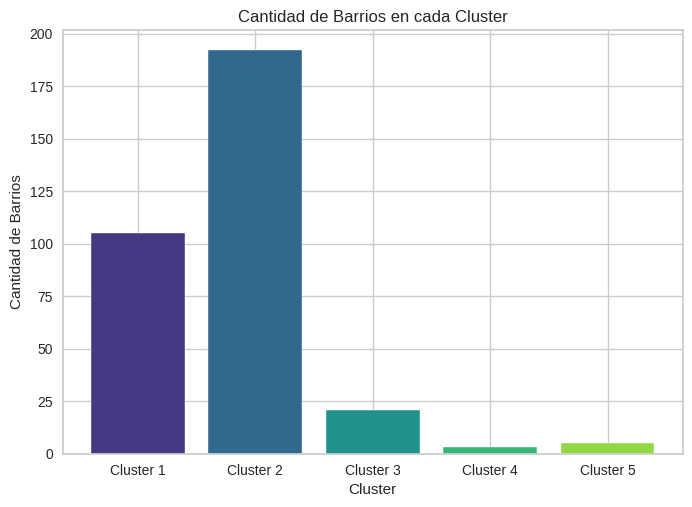

In [114]:
import seaborn as sns

# Contar la cantidad de barrios en cada cluster
count_cluster_1 = len(cluster_1)
count_cluster_2 = len(cluster_2)
count_cluster_3 = len(cluster_3)
count_cluster_4 = len(cluster_4)
count_cluster_5 = len(cluster_5)

# Crear una lista de los conteos
counts = [count_cluster_1, count_cluster_2, count_cluster_3, count_cluster_4, count_cluster_5]

# Etiquetas para los clusters
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Utilizar la paleta de colores "viridis" de Seaborn
colors = sns.color_palette("viridis", n_colors=len(counts))

# Crear el gráfico de barras con colores personalizados
plt.bar(cluster_labels, counts, color=colors)

# Agregar etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Barrios')
plt.title('Cantidad de Barrios en cada Cluster')

# Mostrar el gráfico
plt.show()

In [120]:
cluster_5

,Barrio,Cluster,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Con heridos,Con muertos,Solo danos,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de disenos,Paso Elevado,Puente,Tramo de via,Total de accidentes
53,Campo Amor,5,252.0,346.0,3922.0,469.0,177.0,2428.0,28.0,2710.0,22.0,632.0,476.0,336.0,18.0,79.0,32.0,3571.0,5166.0
56,Caribe,5,200.0,350.0,3593.0,538.0,171.0,2489.0,25.0,2338.0,18.0,17.0,371.0,476.0,47.0,87.0,23.0,3813.0,4852.0
130,La Alpujarra,5,96.0,141.0,2267.0,193.0,64.0,1053.0,13.0,1695.0,13.0,699.0,149.0,118.0,55.0,176.0,55.0,1496.0,2761.0
133,La Candelaria,5,1007.0,354.0,4130.0,315.0,109.0,2455.0,26.0,3434.0,33.0,3.0,1198.0,329.0,12.0,4.0,1.0,4335.0,5915.0
230,Perpetuo Socorro,5,202.0,295.0,3986.0,453.0,155.0,2382.0,22.0,2687.0,23.0,124.0,1021.0,299.0,16.0,77.0,70.0,3461.0,5091.0


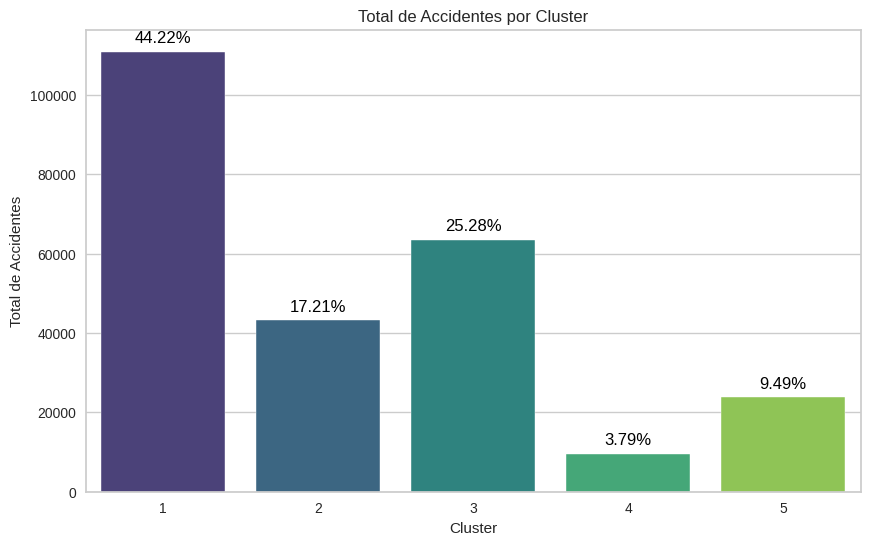

In [115]:
# Agrupa los datos por cluster y suma el total de accidentes
cluster_totals = data_cluster.groupby('Cluster')['Total de accidentes'].sum().reset_index()

# Calcula el total de accidentes en todos los clusters
total_accidents = cluster_totals['Total de accidentes'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cluster', y='Total de accidentes', data=cluster_totals, palette='viridis')

# Agrega etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Cluster')

# Agrega el porcentaje dentro de cada barra
for p in ax.patches:
    percentage = f'{p.get_height() / total_accidents * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Muestra el gráfico
plt.show()

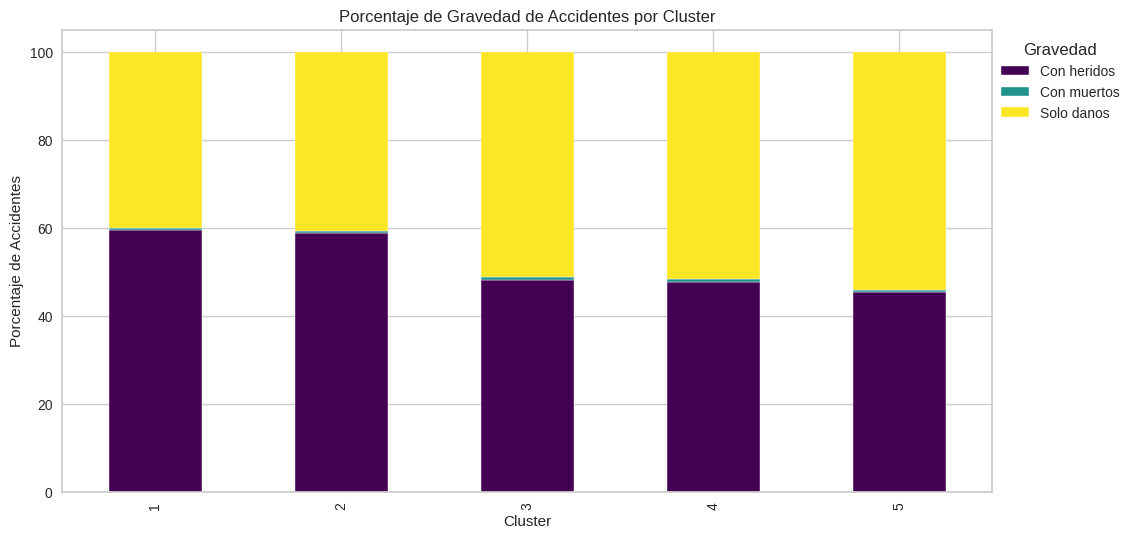

In [116]:
# Filtra las columnas relevantes y agrupa por Cluster
data_cluster_gravity = data_cluster[['Cluster', 'Con heridos', 'Con muertos', 'Solo danos']]
cluster_gravity_grouped = data_cluster_gravity.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_gravity_grouped_normalized = cluster_gravity_grouped.div(cluster_gravity_grouped.sum(axis=1), axis=0) * 100

# Crea un gráfico de barras apiladas con los porcentajes
cluster_gravity_grouped_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

# Configura las etiquetas y el título
plt.xlabel('Cluster')
plt.ylabel('Porcentaje de Accidentes')
plt.title('Porcentaje de Gravedad de Accidentes por Cluster')

# Muestra el gráfico
plt.legend(title='Gravedad', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [117]:
# Filtra las columnas relevantes y agrupa por Cluster
data_cluster_gravity = data_cluster[['Cluster', 'Con heridos', 'Con muertos', 'Solo danos']]
cluster_gravity_grouped = data_cluster_gravity.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_gravity_grouped_normalized = cluster_gravity_grouped.div(cluster_gravity_grouped.sum(axis=1), axis=0) * 100

# Crea un DataFrame con la cantidad y porcentaje por gravedad de cada cluster
cluster_gravity_table = pd.concat([cluster_gravity_grouped, cluster_gravity_grouped_normalized], axis=1)
cluster_gravity_table.columns = ['Con heridos', 'Con muertos', 'Solo daños', 'Porcentaje Con heridos', 'Porcentaje Con muertos', 'Porcentaje Solo daños']

# Muestra la tabla
cluster_gravity_table

,Con heridos,Con muertos,Solo daños,Porcentaje Con heridos,Porcentaje Con muertos,Porcentaje Solo daños
Cluster,,,,,,
1,65928.0,607.0,44349.0,59.456730,0.547419,39.995852
2,25382.0,223.0,17549.0,58.817259,0.516754,40.665987
3,30577.0,375.0,32439.0,48.235554,0.591567,51.172879
4,4531.0,65.0,4919.0,47.619548,0.683132,51.697320
5,10807.0,114.0,12864.0,45.436199,0.479294,54.084507


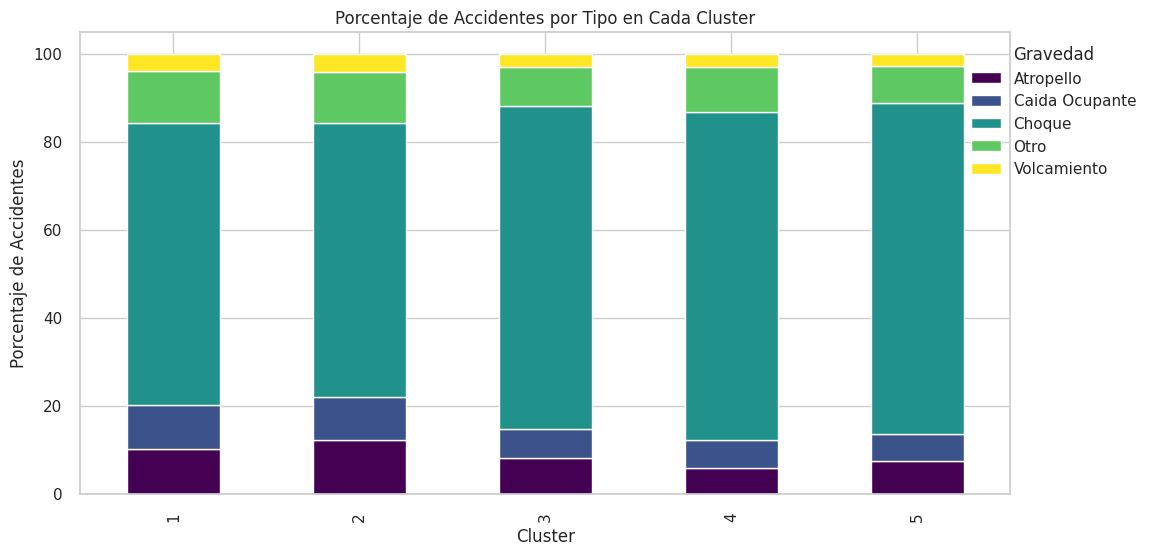

In [118]:
# Filtra las columnas relevantes y agrupa por Cluster
data_cluster_accidents = data_cluster[['Cluster', 'Atropello', 'Caida Ocupante', 'Choque', 'Otro', 'Volcamiento']]
cluster_accidents_grouped = data_cluster_accidents.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_accidents_grouped_normalized = cluster_accidents_grouped.div(cluster_accidents_grouped.sum(axis=1), axis=0) * 100

# Establece un estilo similar al de Seaborn
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Crea un gráfico de barras apiladas con los porcentajes
cluster_accidents_grouped_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

# Configura las etiquetas y el título
plt.title("Porcentaje de Accidentes por Tipo en Cada Cluster")
plt.xlabel("Cluster")
plt.ylabel("Porcentaje de Accidentes")
plt.legend(title="Tipo de Accidente")

# Muestra el gráfico
plt.legend(title='Gravedad', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:
# Filtra las columnas relevantes y agrupa por Cluster
data_cluster_accidents = data_cluster[['Cluster', 'Atropello', 'Caida Ocupante', 'Choque', 'Otro', 'Volcamiento']]
cluster_accidents_grouped = data_cluster_accidents.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_accidents_grouped_normalized = cluster_accidents_grouped.div(cluster_accidents_grouped.sum(axis=1), axis=0) * 100

# Crea un DataFrame con la cantidad y porcentaje por tipo de accidente de cada cluster
cluster_accidents_table = pd.concat([cluster_accidents_grouped, cluster_accidents_grouped_normalized], axis=1)
cluster_accidents_table.columns = ['Atropello', 'Caida Ocupante', 'Choque', 'Otro', 'Volcamiento',
                                   'Porcentaje Atropello', 'Porcentaje Caida Ocupante', 'Porcentaje Choque', 'Porcentaje Otro', 'Porcentaje Volcamiento']

# Muestra la tabla
cluster_accidents_table

,Atropello,Caida Ocupante,Choque,Otro,Volcamiento,Porcentaje Atropello,Porcentaje Caida Ocupante,Porcentaje Choque,Porcentaje Otro,Porcentaje Volcamiento
Cluster,,,,,,,,,,
1,11311.0,11027.0,71065.0,13189.0,4292.0,10.200750,9.944627,64.089499,11.894412,3.870712
2,5283.0,4177.0,26923.0,4959.0,1812.0,12.242202,9.679288,62.388191,11.491403,4.198916
3,5137.0,4236.0,46404.0,5629.0,1985.0,8.103674,6.682337,73.202821,8.879809,3.131359
4,548.0,619.0,7089.0,973.0,286.0,5.759327,6.505518,74.503416,10.225959,3.005780
5,1757.0,1486.0,17898.0,1968.0,676.0,7.387009,6.247635,75.249107,8.274122,2.842127


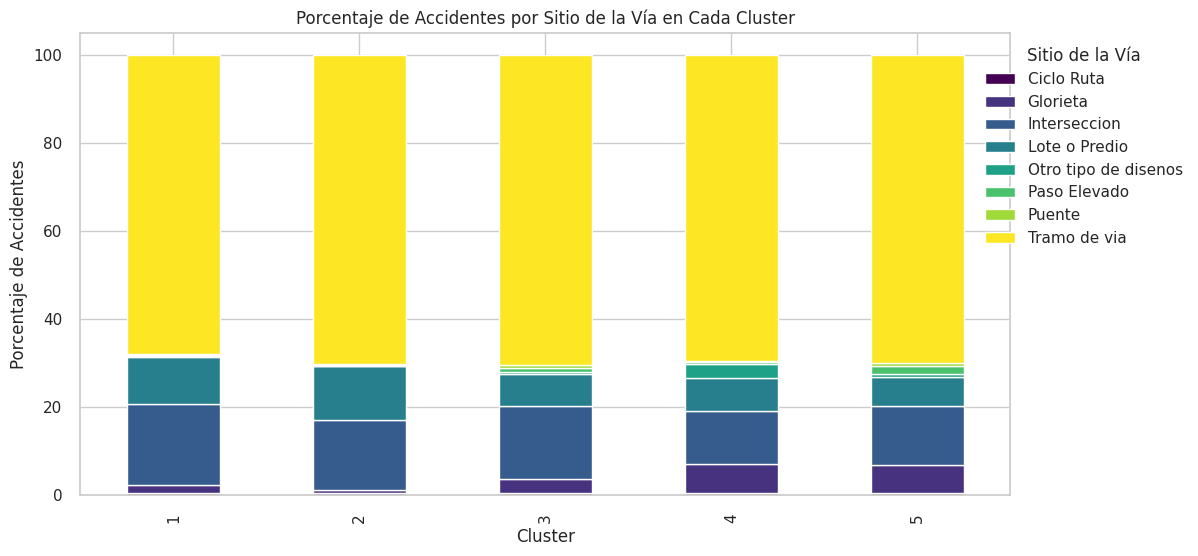

In [119]:
# Filtra las columnas relevantes y agrupa por Cluster
data_cluster_location = data_cluster[['Cluster', 'Ciclo Ruta', 'Glorieta', 'Interseccion', 'Lote o Predio',
                                     'Otro tipo de disenos', 'Paso Elevado', 'Puente', 'Tramo de via']]
cluster_location_grouped = data_cluster_location.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_location_grouped_normalized = cluster_location_grouped.div(cluster_location_grouped.sum(axis=1), axis=0) * 100

# Establece un estilo similar al de Seaborn
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Crea un gráfico de barras apiladas con los porcentajes
cluster_location_grouped_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

# Configura las etiquetas y el título
plt.title("Porcentaje de Accidentes por Sitio de la Vía en Cada Cluster")
plt.xlabel("Cluster")
plt.ylabel("Porcentaje de Accidentes")
plt.legend(title="Sitio de la Vía")

# Muestra el gráfico
plt.legend(title='Sitio de la Vía', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
data_cluster_location = data_cluster[['Cluster', 'Ciclo Ruta', 'Glorieta', 'Interseccion', 'Lote o Predio',
                                     'Otro tipo de disenos', 'Paso Elevado', 'Puente', 'Tramo de via']]
cluster_location_grouped = data_cluster_location.groupby('Cluster').sum()

# Normaliza los valores en cada cluster
cluster_location_grouped_normalized = cluster_location_grouped.div(cluster_location_grouped.sum(axis=1), axis=0) * 100

# Crea un DataFrame con la cantidad y porcentaje por tramo de vía de cada cluster
cluster_location_table = pd.concat([cluster_location_grouped, cluster_location_grouped_normalized], axis=1)
cluster_location_table.columns = ['Ciclo Ruta', 'Glorieta', 'Interseccion', 'Lote o Predio',
                                   'Otro tipo de diseños', 'Paso Elevado', 'Puente', 'Tramo de via',
                                   'Porcentaje Ciclo Ruta', 'Porcentaje Glorieta', 'Porcentaje Interseccion',
                                   'Porcentaje Lote o Predio', 'Porcentaje Otro tipo de diseños',
                                   'Porcentaje Paso Elevado', 'Porcentaje Puente', 'Porcentaje Tramo de via']

# Muestra la tabla
cluster_location_table

,Ciclo Ruta,Glorieta,Interseccion,Lote o Predio,Otro tipo de diseños,Paso Elevado,Puente,Tramo de via,Porcentaje Ciclo Ruta,Porcentaje Glorieta,Porcentaje Interseccion,Porcentaje Lote o Predio,Porcentaje Otro tipo de diseños,Porcentaje Paso Elevado,Porcentaje Puente,Porcentaje Tramo de via
Cluster,,,,,,,,,,,,,,,,
1,424.0,1947.0,20479.0,11930.0,140.0,239.0,268.0,75457.0,0.382382,1.755889,18.468850,10.758991,0.126258,0.215541,0.241694,68.050395
2,154.0,331.0,6864.0,5262.0,42.0,69.0,73.0,30359.0,0.356861,0.767020,15.905826,12.193539,0.097326,0.159892,0.169162,70.350373
3,232.0,1991.0,10605.0,4572.0,256.0,543.0,418.0,44774.0,0.365983,3.140824,16.729504,7.212380,0.403843,0.856588,0.659400,70.631478
4,43.0,610.0,1166.0,697.0,304.0,41.0,27.0,6627.0,0.451918,6.410930,12.254335,7.325276,3.194955,0.430899,0.283762,69.647924
5,109.0,1475.0,3215.0,1558.0,148.0,423.0,181.0,16676.0,0.458272,6.201387,13.516922,6.550347,0.622241,1.778432,0.760984,70.111415


# ***PRUEBAS***